# **Fintech Loan Data Analysis & Preprocessing**

## **Overview**  
This milestone focuses on **cleaning, feature engineering, and analyzing** fintech loan data to prepare it for machine learning models. Key steps include handling missing values, transforming features, and visualizing important insights.  

## **Key Steps**  
- Standardized column names and handled duplicates.  
- Imputed missing values based on feature correlations.  
- Engineered new features like **loan affordability and monthly installment calculations**. 
- Enriched the dataset by adding a **state_name** column, mapping state codes to full state names using data extracted via web scraping.
- Visualized data distributions and correlations for insights.  
- Encoded categorical variables and normalized numerical features.  
- Saved processed datasets and lookup tables for tracking changes.  

## **How to Use**  
- Run the notebook sequentially to see data transformations.  
- The final dataset is ready for machine learning applications. 🚀



# **Data Overview:**

In [70]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [71]:
# This loads and previews data from a CSV file.

def load_and_preview_data(file_path):
    """
    Loads data from a CSV file, creates a copy, and previews the first few rows.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the loaded data.
    """
    original = pd.read_csv(file_path)
    df = original.copy()
    df.head()  # Preview the data
    return df

# load the data
df = load_and_preview_data('data/fintech_data_5_64_19288.csv')

# Display the first rows of the DataFrame to preview the data.
df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,...,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidDNS4kXHhhNVx4MThceDhhXlx4ZjQ1XHhjNFxuTVx4OT...,NaN,NaN,MORTGAGE,16344.0,56184.0,Verified,379xx,TN,22412.0,...,TN,15475.0,36 months,0.1199,7,17 August 2017,False,Joint App,debt_consolidation,Debt consolidation
1,Yicpb0chXHhkM1x4YjhceDE3XHg4ZVx4ZjBuXHhlZVx4Y2...,NaN,< 1 year,RENT,84000.0,NaN,Not Verified,314xx,GA,2187.0,...,GA,7000.0,36 months,0.2880,16,19 November 2019,False,Individual,debt_consolidation,Debt consolidation
2,YidceGQ1YFx4ZDJadDJceGYyXHhiYnpceGNhdmAjL1hceG...,Advancement Assistant,2 years,RENT,42800.0,NaN,Not Verified,029xx,RI,1975.0,...,RI,17500.0,36 months,0.0756,1,19 March 2019,False,Individual,debt_consolidation,Debt consolidation
3,YidceDE1XHhhZHlceGQxXHhlM1x4ZTVceGIzXHgxYVx4Ym...,Montgomery county Public School,6 years,RENT,66450.0,NaN,Not Verified,212xx,MD,8896.0,...,MD,12000.0,36 months,0.1311,8,13 January 2013,False,INDIVIDUAL,debt_consolidation,Personal
4,YidQXHhhOVx4ODRceDkyV1x4OWNceGNmXHhjMyxcXFx4MT...,Supervisor,3 years,RENT,48000.0,NaN,Not Verified,921xx,CA,6101.0,...,CA,4000.0,36 months,NaN,3,18 May 2018,False,Individual,debt_consolidation,Debt consolidation


In [72]:
# check for most proper column to be an index
df.nunique()

Customer Id            27030
Emp Title              13226
Emp Length                11
Home Ownership             4
Annual Inc              3096
Annual Inc Joint         693
Verification Status        3
Zip Code                 852
Addr State                51
Avg Cur Bal            16992
Tot Cur Bal            25547
Loan Id                27030
Loan Status                6
Loan Amount             1211
State                     51
Funded Amount           1211
Term                       2
Int Rate                 368
Grade                     35
Issue Date                89
Pymnt Plan                 2
Type                       5
Purpose                   13
Description              807
dtype: int64

In [73]:
#information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24673 non-null  object 
 2   Emp Length           25183 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1946 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

In [74]:
df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1.946000e+03,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25776.000000,27030.000000
mean,8.074346e+04,1.338294e+05,13721.055235,1.459699e+05,135609.938550,15466.890492,15466.890492,0.130775,10.940067
std,1.156949e+05,1.892703e+05,16585.341509,1.655187e+05,78036.147212,9476.026925,9476.026925,0.049048,6.349919
min,2.000000e+02,1.720000e+04,0.000000,1.000000e+00,6.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.800000e+04,8.653325e+04,3125.000000,2.974975e+04,68361.000000,8000.000000,8000.000000,0.094300,6.000000
50%,6.631750e+04,1.150000e+05,7414.500000,8.161050e+04,135334.000000,13200.000000,13200.000000,0.126100,10.000000
75%,9.500000e+04,1.550000e+05,18892.500000,2.170360e+05,203283.500000,20518.750000,20518.750000,0.159900,15.000000
max,9.550000e+06,7.874821e+06,307758.000000,4.127799e+06,270292.000000,40000.000000,40000.000000,0.309900,35.000000


# **Data Cleaning**
This section prepares the data for further analysis by ensuring consistency and reducing potential errors. using these functions:

1.   **standardize_dataframe** : Transforms the DataFrame into a standardized format by making column names lowercase with underscores instead of spaces and by converting all values in categorical columns to lowercase, Then set the **Customer ID & Loan ID** as index.

2.   **standardize_issue_date**: transforms a date column into a proper datetime format, extracts the month, sorts the data by date, and creates a lookup table to track changes.

3.   **standardize_employment_length**: cleans and transforms the 'employment length' column in a DataFrame, converting entries like '< 1 year', '10+ years', and '2 years' into numerical values (0.5, 10, 2.0) for easier analysis. It also creates a lookup table to document the transformations.
4.   **transform_grade_to_letter**: converts numerical grades 'grade' column into letter grades (A-G) based on predefined ranges. It creates a new 'grade_letter' column to store these letter grades. It also creates a lookup table to document the transformations.

5.   **handling duplicates data**: This function is designed to find and remove duplicate rows from the DataFrame. It also saves the removed rows(if founded) to a separate file for tracking.
6.   **check missing values**: identifying, analyzing, and reporting on missing values. It provides a comprehensive overview of the missing data, helps to understand the extent and nature of missingness.

7.   **Handling missing data**: systematic approach involves analyzing each column with missing values to identify the most suitable imputation technique.


In [75]:
# @title Standardize_dataframe
#Transforms the DataFrame into a standardized format for further processing.
def standardize_dataframe(df):
    """
    Cleans and standardizes a pandas DataFrame by:
    1. Converting column names to lowercase and replacing spaces with underscores.
    2. Converting values in categorical columns to lowercase.
    3. Setting 'Customer ID' as the index and dropping 'Loan ID'.
    Args:
        df: The pandas DataFrame to clean and standardize.

    Returns:
        A cleaned and standardized pandas DataFrame.
    """

    # Clean column names
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')

    # Standardize categorical values
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        df[col] = df[col].str.lower()

    # Check if DataFrame is already indexed by 'customer_id' and 'loan_id'
    if not df.index.names == ['customer_id', 'loan_id']:
        # set customer_id & loan_id as index
        df.set_index(['customer_id','loan_id'], inplace=True)
        print("DataFrame Standardized successfully")
    else:
        print("DataFrame is already standardized.")

    return df
df = standardize_dataframe(df)
df.head()

DataFrame Standardized successfully


,,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,
yiddns4kxhhhnvx4mthcedhhxlx4zjq1xhhjnfxutvx4otrcedezmfx4owrvpvx4ztdceda3xhhjnvx4zjh3xhhlnlx4zthceda0xhhmm2fcegnhxhgxovx4zgen,160033,NaN,NaN,mortgage,16344.0,56184.0,verified,379xx,tn,22412.0,156883.0,...,tn,15475.0,36 months,0.1199,7,17 august 2017,False,joint app,debt_consolidation,debt consolidation
yicpb0chxhhkm1x4yjhcede3xhg4zvx4zjbuxhhlzvx4y2rbxhhhmvx4ythcedk1ffx4mdnamy1izvx4yjlcedg3a1x4ztnxfxjcegnixhgxysc=,55882,NaN,< 1 year,rent,84000.0,NaN,not verified,314xx,ga,2187.0,10936.0,...,ga,7000.0,36 months,0.2880,16,19 november 2019,False,individual,debt_consolidation,debt consolidation
yidcegq1yfx4zdjaddjcegyyxhhiynpcegnhdmajl1hcegy1xhg5odjceddmjfx4zmvcegu5xhg4oezcegfjxhhhmfx4zjzcegm5elx4owzcedk3xhgwyic=,174680,advancement assistant,2 years,rent,42800.0,NaN,not verified,029xx,ri,1975.0,19746.0,...,ri,17500.0,36 months,0.0756,1,19 march 2019,False,individual,debt_consolidation,debt consolidation
yidcede1xhhhzhlcegqxxhhlm1x4ztvcegizxhgxyvx4ymfcedg5csfysfx4otj9xhg4nvx4ywvcedeyxhhkzeyixhhinwxexhgxnfx4mwv9xhhinlx4ztlcxfx4zjcn,122019,montgomery county public school,6 years,rent,66450.0,NaN,not verified,212xx,md,8896.0,115647.0,...,md,12000.0,36 months,0.1311,8,13 january 2013,False,individual,debt_consolidation,personal
yidqxhhhovx4odrcedkyv1x4owncegnmxhhjmyxcxfx4mtdmxhhizvx4ywqvxhhjzw5cedk2yvx4owrdujbvxhg4mlx4odbcegrlxhhly3g0sfx4oten,16727,supervisor,3 years,rent,48000.0,NaN,not verified,921xx,ca,6101.0,36606.0,...,ca,4000.0,36 months,NaN,3,18 may 2018,False,individual,debt_consolidation,debt consolidation


In [76]:
# @title Standardize_issue_date
def standardize_issue_date(df, issue_date_column='issue_date'):
    """
    Transforms the 'issue_date' column to a date type in place, extracts the month number into a new column,
    sorts the DataFrame by the transformed date, and saves the changes into a CSV lookup table.

    Args:
        df: The pandas DataFrame to modify.
        issue_date_column: The name of the column containing the issue date (default: 'issue_date').

    Returns:
        The modified and sorted DataFrame with the transformed issue date and month number column.
    """

    # 1. Convert 'issue_date' to datetime in place
    df[issue_date_column] = pd.to_datetime(df[issue_date_column])

    # 2. Extract month number
    df['issue_month'] = df[issue_date_column].dt.month

    # 3. Sort by 'issue_date' (now a datetime column)
    df.sort_values(by=[issue_date_column], inplace=True)

    # 4. Create lookup table
    lookup_df = df[[issue_date_column, 'issue_month']].copy()
    lookup_df.rename(columns={issue_date_column: 'transformed_issue_date'}, inplace=True)

    # Change 'issue_d' to 'issue_date' to match the renamed column
    lookup_df['original_issue_date'] = df['issue_date'].astype(str)
    lookup_df.to_csv('lookup_tables/issue_date_lookup.csv', index=False)
    print("Lookup table saved to issue_date_lookup.csv")

    return df
df = standardize_issue_date(df)

Lookup table saved to issue_date_lookup.csv


C:\Users\DELL\AppData\Local\Temp\ipykernel_11792\138396053.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[issue_date_column] = pd.to_datetime(df[issue_date_column])




---



In [77]:
# @title standardize_employment_length
def standardize_emp_length(df, emp_length_column='emp_length', lookup_path='lookup_tables/emp_length_lookup.csv'):
    """
    Standardizes the employment length column in a DataFrame.

    Args:
        df (pd.DataFrame): The pandas DataFrame to modify.
        emp_length_column (str, optional): The name of the column containing employment length. Defaults to 'emp_length'.
        lookup_path (str, optional): The path to save the lookup table CSV. Defaults to 'emp_length_lookup.csv'.

    Returns:
        pd.DataFrame: The modified DataFrame with the standardized employment length column.

    Raises:
        ValueError: If the specified emp_length_column is not found in the DataFrame.
    """

    if emp_length_column not in df.columns:
        raise ValueError(f"Column '{emp_length_column}' not found in DataFrame.")

    # Create a lookup table DataFrame
    lookup_df = df[[emp_length_column]].copy()
    lookup_df.rename(columns={emp_length_column: 'original_emp_length'}, inplace=True)

    # Replace specific values using a dictionary mapping
    replacements = {'< 1 year': '0.5', '10+ years': '10'}
    df[emp_length_column] = df[emp_length_column].replace(replacements, regex=False)

    # Extract numerical part and convert to float using regex and pd.to_numeric
    # The regex r'(\d+\.?\d*)' captures numerical values (integers or floats).
    # Check if values already match the desired format (numeric)
    # If they do, skip the extraction and conversion
    if not pd.api.types.is_numeric_dtype(df[emp_length_column]):  # Check if dtype is not numeric
        # Extract numerical part and convert to float using regex r'(\d+\.?\d*)' and pd.to_numeric
        df[emp_length_column] = df[emp_length_column].astype(str).str.extract(r'(\d+\.?\d*)') # Explicitly converting to string before extracting
        df[emp_length_column] = pd.to_numeric(df[emp_length_column], errors='coerce')  # Handle non-numeric values
    else:
        print(f"Values in '{emp_length_column}' already match the desired format. Skipping extraction.")

    # Update the lookup table
    lookup_df['emp_length_flt'] = df[emp_length_column]
    lookup_df.to_csv(lookup_path, index=False)
    print(f"Lookup table saved to {lookup_path}")

    return df

df = standardize_emp_length(df)
df['emp_length'].dtype

Lookup table saved to lookup_tables/emp_length_lookup.csv


dtype('float64')

In [78]:
df['emp_length'].head(5)

customer_id                                                                                                                                               loan_id
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=                                      7364       10.0
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci                                          46875       0.5
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=          24085      10.0
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn  141865      8.0
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=                                                      9843



---



In [79]:
# @title transform_grade_to_letter
def transform_grade_to_letter (df, grade_column='grade'):
    """
    Transforms numerical grades in a DataFrame column to letter grades (A-G)
    based on predefined ranges and saves a lookup table of the transformations.

    Args:
        df (pd.DataFrame): The input DataFrame containing the numerical grades.
        grade_column (int64, optional): The name of the column containing numerical
            grades. Defaults to 'grade'.

    Returns:
        pd.DataFrame: The modified DataFrame with a new 'grade_letter' column
            containing the letter grades.
    """
    # Define conditions and corresponding letter grades
    conditions = [
        (df[grade_column] >= 1) & (df[grade_column] <= 5),
        (df[grade_column] >= 6) & (df[grade_column] <= 10),
        (df[grade_column] >= 11) & (df[grade_column] <= 15),
        (df[grade_column] >= 16) & (df[grade_column] <= 20),
        (df[grade_column] >= 21) & (df[grade_column] <= 25),
        (df[grade_column] >= 26) & (df[grade_column] <= 30),
        (df[grade_column] >= 31) & (df[grade_column] <= 35)
    ]
    choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

    # Apply conditions using numpy.select to create the 'grade_letter' column
    df['grade_letter'] = np.select(conditions, choices, default=None)

    # Create lookup table
    lookup_df = df[[grade_column, 'grade_letter']].copy()
    lookup_df.rename(columns={grade_column: 'original_grade'}, inplace=True)
    lookup_df.to_csv('lookup_tables/grade_letter_lookup.csv', index=False)
    print("Lookup table saved to grade_letter_lookup.csv")

    return df
# Apply transformation
df = transform_grade_to_letter(df)
df['grade_letter'].sort_values().unique()

Lookup table saved to grade_letter_lookup.csv


array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)



---



In [80]:
# @title handling duplicates data

def detect_and_drop_duplicates(df, subset=None ):
    """
    Detects and drops duplicate rows in a DataFrame, saving dropped rows(if founded) to a CSV lookup table.

    Args:
        df (pd.DataFrame): The input DataFrame.
        subset (list, optional): Columns to consider for identifying duplicates. Defaults to None (all columns).

    Returns:
        pd.DataFrame: The DataFrame with duplicates removed.
    """

    # Identify duplicates
    duplicates = df[df.duplicated( subset=subset )]

    # Save duplicates to CSV
    if not duplicates.empty:
        duplicates.to_csv('lookup_tables/duplicate_rows_lookup.csv', index=False)
        print("Duplicate rows saved to duplicate_rows_lookup.csv")
    else:
        print("No duplicate rows found.")

    # Drop duplicates and return the DataFrame
    df.drop_duplicates(subset=subset, inplace=True)
    return df
df = detect_and_drop_duplicates(df)

No duplicate rows found.




---



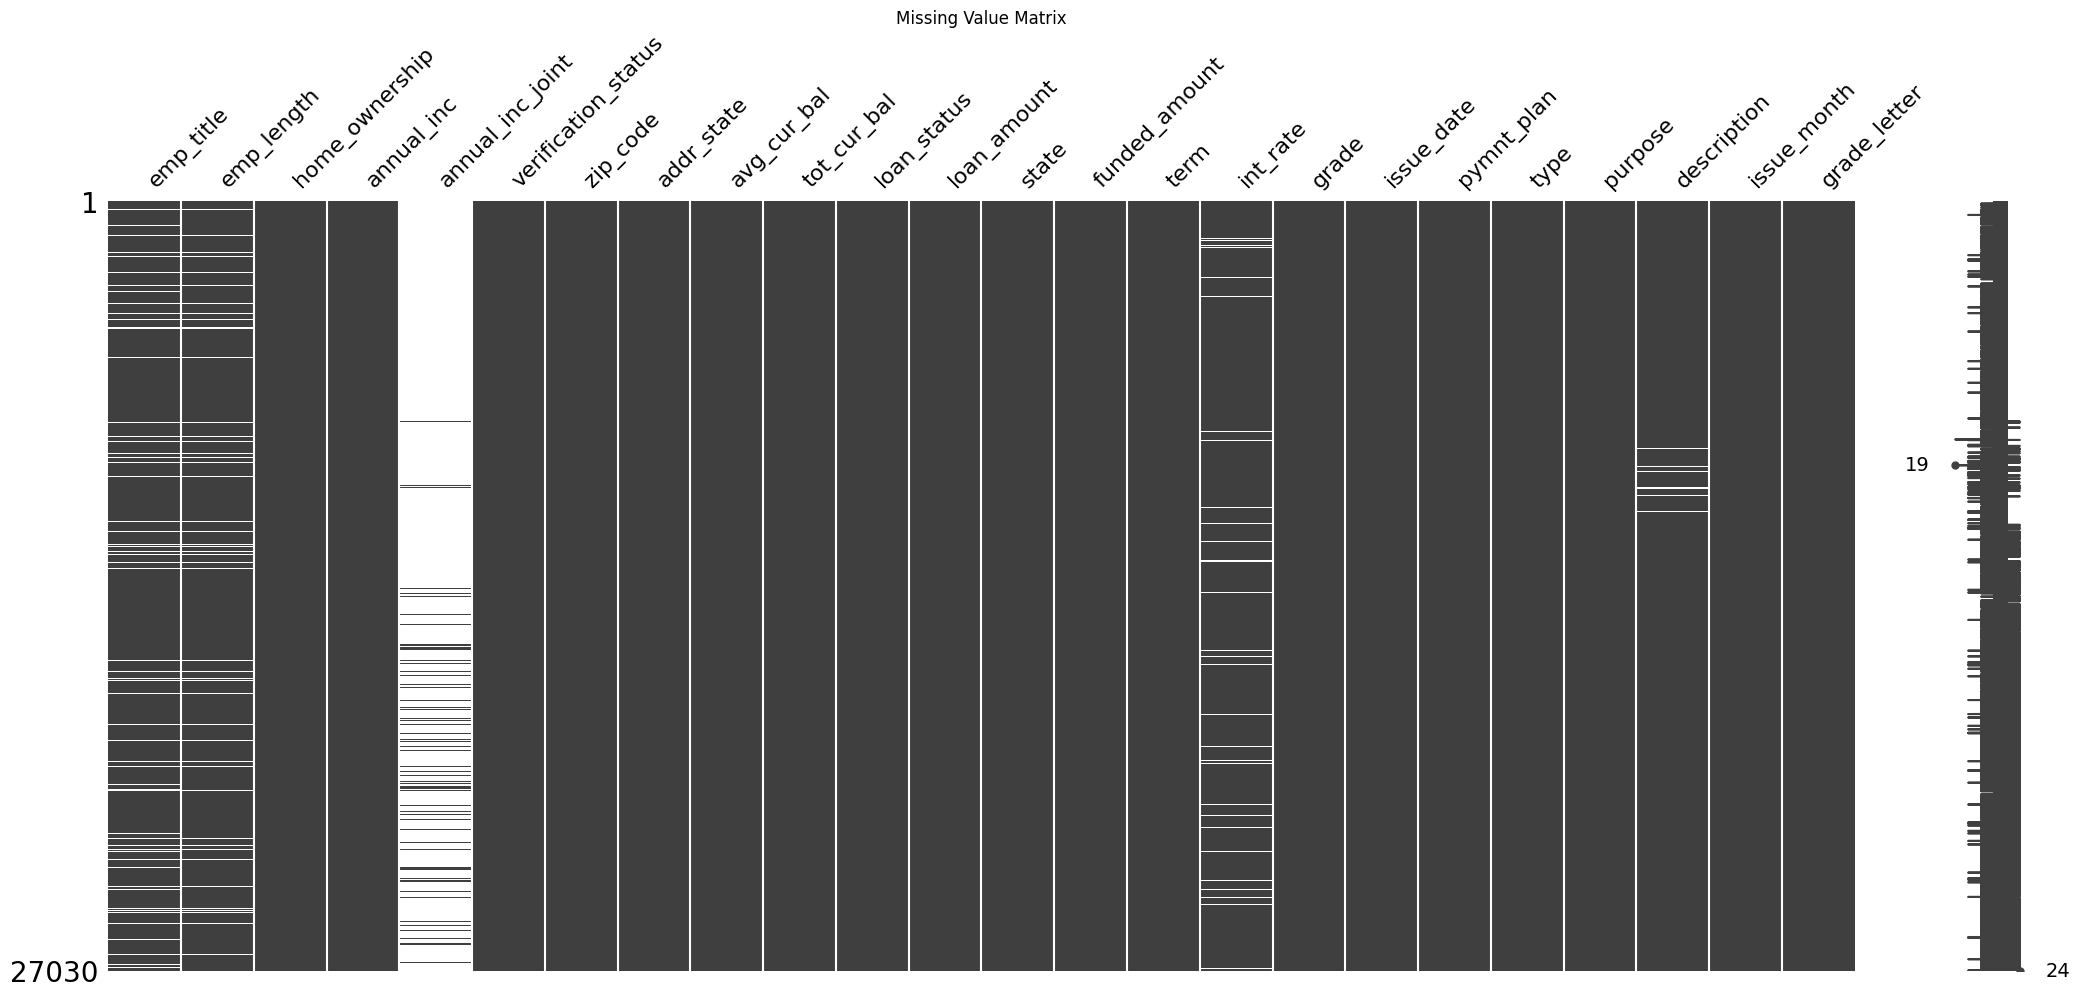

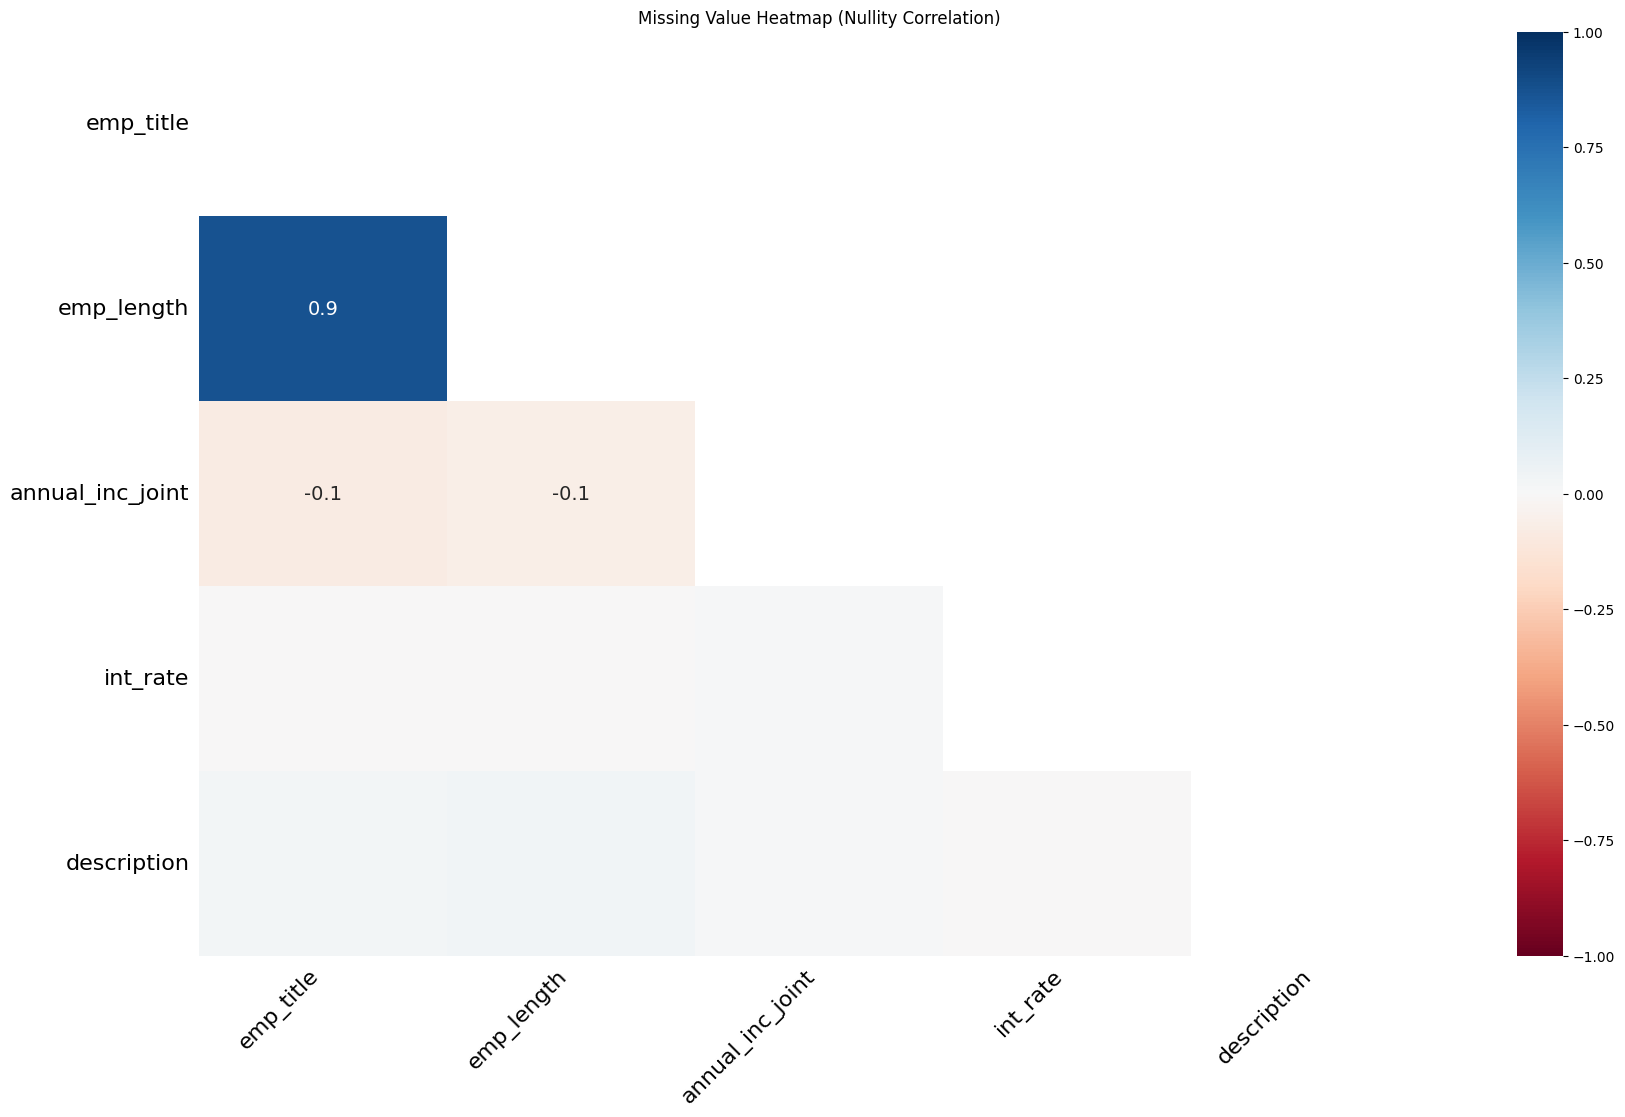

Summary saved to missing_values_summary.csv


,Missing Values,Percentage
annual_inc_joint,25084,92.8%
emp_title,2357,8.7%
emp_length,1847,6.8%
int_rate,1254,4.6%
description,261,1.0%


In [81]:
# @title check missing values
def check_missing_values(df, show_plots=True, export_csv=False):
    """
    Checks for missing values in a DataFrame and returns a formatted summary.

    Args:
        df: The pandas DataFrame to check.
        show_plots (bool): Whether to display visualizations.
        export_csv (bool): Whether to save the summary to a CSV file.

    Returns:
        pd.DataFrame: Summary of missing values.
    """
    # Calculate missing values and percentages
    missing_data = df.isna().sum()
    percentage_missing = (missing_data * 100 / len(df))
    missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': percentage_missing})
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
    missing_df['Percentage'] = missing_df['Percentage'].map("{:.1f}%".format)

    # Check if there are any missing values
    if missing_df.empty:
        print("No missing values found in the DataFrame.")

    # Show visualizations if enabled
    if show_plots:
        import missingno as msno  # Import missingno inside the function
        import matplotlib.pyplot as plt  # Import matplotlib inside the function

        msno.matrix(df)
        plt.title('Missing Value Matrix')
        plt.show()

        msno.heatmap(df)
        plt.title('Missing Value Heatmap (Nullity Correlation)')
        plt.show()

    # Export to CSV if enabled
    if export_csv:
        missing_df.to_csv('lookup_tables/missing_values_summary_lookup.csv', index=True)
        print("Summary saved to missing_values_summary.csv")

    return missing_df

# Example usage
missing_df = check_missing_values(df, show_plots=True, export_csv=True)
missing_df



---



## Handling missing data

###  1- Handling missing data in employment title and employment length

* Analyze missing data patterns for 'emp_title' and 'emp_length'

In [82]:
# Check for missing data in each column
title_null = df['emp_title'].isna()
length_null = df['emp_length'].isna()

# Define patterns
total_rows = len(df)
both_null = title_null & length_null
title_only_null = title_null & ~length_null
length_only_null = length_null & ~title_null

# Count and percentage
analysis_results = {
    'both_null': {'count': both_null.sum(), 'percentage': (both_null.sum() / total_rows) * 100},
    'title_only_null': {'count': title_only_null.sum(), 'percentage': (title_only_null.sum() / total_rows) * 100},
    'length_only_null': {'count': length_only_null.sum(), 'percentage': (length_only_null.sum() / total_rows) * 100},
}

# Convert results to DataFrame
analysis_results_df = pd.DataFrame(analysis_results).T  # Transpose for readability
analysis_results_df['percentage'] = analysis_results_df['percentage'].map("{:.2f}%".format)

# Display the results
print(analysis_results_df.to_string(), '\n\n summary of missing data in the employment_title and experience of customers')

                   count percentage
both_null         1836.0      6.79%
title_only_null    521.0      1.93%
length_only_null    11.0      0.04% 

 summary of missing data in the employment_title and experience of customers


The fact that the majority of missingness occurs in both columns simultaneously (rather than just one) strongly indicates that the missingness might depend on unreported values of emp_title and emp_length themselves

In [83]:
# Group data by income bins to analyze missingness in 'emp_title' and 'emp_length'
# Define your bin edges and labels (as before)
bins = [0, 25000, 50000, 75000, 100000, float('inf')]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+']

# Group by using pd.cut directly within groupby
nullity_by_income = df.groupby(pd.cut(df['annual_inc'], bins=bins, labels=labels, include_lowest=True))[['emp_title', 'emp_length']].apply(lambda x: x.isnull().sum())

# Display the results
nullity_by_income

C:\Users\DELL\AppData\Local\Temp\ipykernel_11792\1385734020.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nullity_by_income = df.groupby(pd.cut(df['annual_inc'], bins=bins, labels=labels, include_lowest=True))[['emp_title', 'emp_length']].apply(lambda x: x.isnull().sum())


,emp_title,emp_length
annual_inc,,
0-25k,447,408
25k-50k,823,707
50k-75k,539,429
75k-100k,273,183
100k+,275,120


* The 0-25k and 25k-50k income groups show the highest counts of missing values for both emp_title and emp_length.
* This might suggest that individuals in lower income brackets are less likely to report or have standardized employment data.

In [84]:
# Group data by state and analyze missingness in 'emp_title' and 'emp_length'
# Group data by state and count missing values
missing_counts = df.groupby('state')[['emp_title', 'emp_length']].apply(lambda x: x.isnull().sum())

# Display the results
print(missing_counts)

# Count the number of states with missing values in either column
states_with_missing = missing_counts[(missing_counts['emp_title'] > 0) | (missing_counts['emp_length'] > 0)].index.nunique()

print(f"\nNumber of states with missing values in 'emp_title' or 'emp_length': {states_with_missing}")

       emp_title  emp_length
state                       
ak             6           4
al            35          32
ar            19          18
az            65          57
ca           286         209
co            49          36
ct            33          26
dc             4           2
de            11           9
fl           201         161
ga            85          70
hi            10           8
ia             0           0
id            12          10
il            90          67
in            40          35
ks            21          17
ky            33          29
la            33          24
ma            38          25
md            54          44
me            12          11
mi            61          55
mn            34          23
mo            34          28
ms            23          19
mt             6           4
nc            70          60
nd             4           3
ne             4           2
nh            11           8
nj            73          57
nm            

* Analysis of missing data in 'employment title' and 'employment length' shows that this missingness is widespread, affecting records from all 50 states. This suggests the missingness is not isolated to specific geographical locations

* From the anaylsis above, we clearly see that **employment title and employment years** have a strong positive Nullity Correlation (0.9), which indicates that these values are of the **MNAR** type. this assumption due to :


If individuals without formal job titles (emp_title) or irregular employment histories (emp_length) are less likely to report these fields, the missingness directly depends on the values of the missing fields themselves.
This makes the missingness Not at Random (MNAR).
Example Scenarios: People who are unemployed, self-employed, or in informal jobs may leave these fields blank intentionally.
Someone without a significant employment history (short emp_length) may leave both fields (emp_title and emp_length) blank.

to impute these two columns we decide to :   

1- if both values are null that means the customer is unemployed and has no experience so emp_title := 'unemployed' and emp_length := 0

2- if the title is null and it has experience so its difficult to decide his occupation so we impute the emp_title := 'unknown'.

3- if the emp_length is null and it has title most probably it has no experience so we impute the emp_length := 0.1 .

In [85]:
def impute_employment_data(df):
    """
    Imputes missing values in 'emp_title' and 'emp_length' columns
    and creates a CSV lookup table.

    Imputation Logic:
    1. If both 'emp_title' and 'emp_length' are null, impute 'emp_title' with 'unemployed' and 'emp_length' with 0.
    2. If 'emp_title' is null but 'emp_length' is not null, impute 'emp_title' with 'unknown'.
    3. If 'emp_length' is null but 'emp_title' is not null, impute 'emp_length' with 0.10.

    Args:
        df: The pandas DataFrame to modify.

    Returns:
        The modified DataFrame with imputed values.
    """
    # Create masks for different missing data scenarios
    mask_both_null = df['emp_title'].isna() & df['emp_length'].isna()
    mask_title_null = df['emp_title'].isna() & ~df['emp_length'].isna()
    mask_length_null = ~df['emp_title'].isna() & df['emp_length'].isna()

    # Create a lookup table DataFrame
    lookup_df = pd.concat([
        df[mask_both_null][['emp_title', 'emp_length']].assign(
            imputed_emp_title='unemployed', imputed_emp_length=0),
        df[mask_title_null][['emp_title', 'emp_length']].assign(
            imputed_emp_title='unknown', imputed_emp_length=df['emp_length']),
        df[mask_length_null][['emp_title', 'emp_length']].assign(
            imputed_emp_title=df['emp_title'], imputed_emp_length=0.1)
    ])

    # Save the lookup table
    lookup_df.rename(columns={'emp_title': 'original_emp_title', 'emp_length': 'original_emp_length'}, inplace=True)
    lookup_df.to_csv('lookup_tables/employment_impution_lookup.csv', index=False)
    print("Lookup table saved to employment_impution_lookup.csv")
    # Impute missing values
    df.loc[mask_both_null, ['emp_title', 'emp_length']] = ['unemployed', 0]
    df.loc[mask_title_null, 'emp_title'] = 'unknown'
    df.loc[mask_length_null, 'emp_length'] = 0.1
    return df

df = impute_employment_data(df)

df[['emp_title','emp_length']].isna().sum()

Lookup table saved to employment_impution_lookup.csv


emp_title     0
emp_length    0
dtype: int64

### 2- Handling missing data in the interest rate feature:
In the correlation matrix we see that there is a strong positive correlation  between the grade and interest rate.

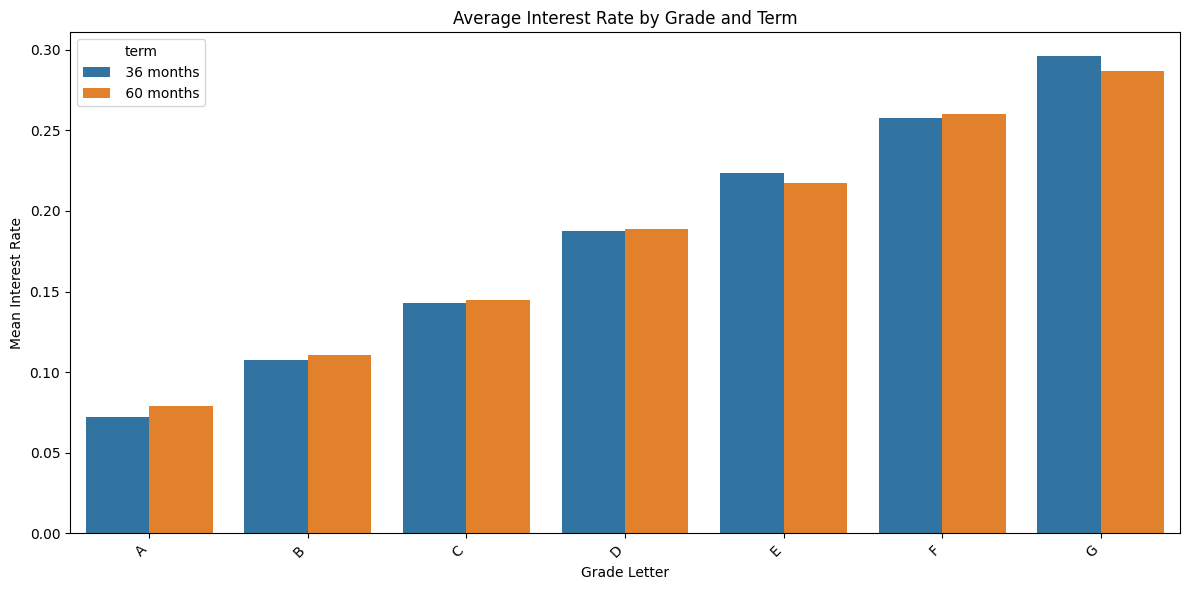

,grade_letter,term,int_rate
0,A,36 months,0.071841
1,A,60 months,0.079139
2,B,36 months,0.107780
3,B,60 months,0.110843
4,C,36 months,0.143163
5,C,60 months,0.144894
6,D,36 months,0.187699
7,D,60 months,0.188704
8,E,36 months,0.223294
9,E,60 months,0.217306


In [86]:
grouped_data = df.groupby(['grade_letter', 'term'])['int_rate'].mean()

# Reset index to make 'grade_letter' and 'term' as columns
grouped_data = grouped_data.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='grade_letter', y='int_rate', hue='term', data=grouped_data)
plt.title('Average Interest Rate by Grade and Term')
plt.xlabel('Grade Letter')
plt.ylabel('Mean Interest Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
grouped_data

The interest rate increases when the risk level becomes higher.

We will analyze the missingness in the dataset based on features such as grade letter, annual income, funded amount, and state. The goal is to identify any patterns that may help us determine the type of missingness, allowing for more informed decisions on how to handle these missing values

* Analyze the Grade letter feature to spot any patterns

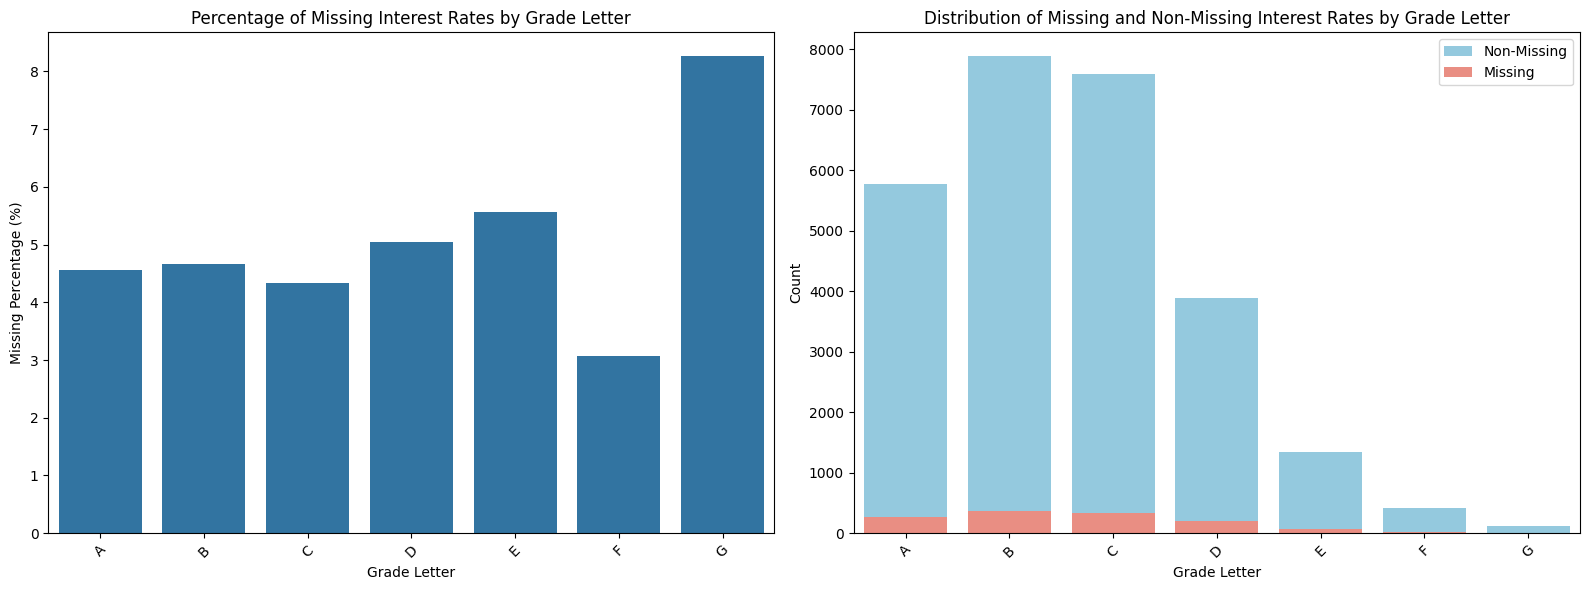

,grade_letter,Missing_Percentage,Total_Count,Missing_Count,Non-Missing_Count
0,A,4.551748,5778,262,5516
1,B,4.665314,7888,368,7520
2,C,4.335222,7589,329,7260
3,D,5.045045,3885,196,3689
4,E,5.572065,1346,75,1271
5,F,3.073286,423,13,410
6,G,8.264463,121,10,111


In [87]:
# Calculate missing percentage by grade letter
missing_by_grade = df.groupby('grade_letter')['int_rate'].apply(lambda x: x.isnull().mean() * 100)

# Create DataFrame with results
grade_analysis = pd.DataFrame({'Missing_Percentage': missing_by_grade})
grade_analysis.index.name = 'grade_letter'
grade_analysis = grade_analysis.reset_index()
grade_analysis['Total_Count'] = df['grade_letter'].value_counts().sort_index().values
grade_analysis['Missing_Count'] = (grade_analysis['Missing_Percentage'] / 100 * grade_analysis['Total_Count']).astype(int)
grade_analysis['Non-Missing_Count'] = grade_analysis['Total_Count'] - grade_analysis['Missing_Count']

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Bar plot of missing percentages
sns.barplot(x='grade_letter', y='Missing_Percentage', data=grade_analysis, ax=axes[0])
axes[0].set_title('Percentage of Missing Interest Rates by Grade Letter')
axes[0].set_xlabel('Grade Letter')
axes[0].set_ylabel('Missing Percentage (%)')
axes[0].tick_params(axis='x', rotation=45, labelrotation=45)

# Stacked bar plot of missing and non-missing counts
sns.barplot(x='grade_letter', y='Total_Count', data=grade_analysis, color='skyblue', label='Non-Missing', ax=axes[1])
sns.barplot(x='grade_letter', y='Missing_Count', data=grade_analysis, color='salmon', label='Missing', ax=axes[1])
axes[1].set_title('Distribution of Missing and Non-Missing Interest Rates by Grade Letter')
axes[1].set_xlabel('Grade Letter')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelrotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

# Display results (optional)
grade_analysis

The analysis of missing interest rates by loan grade reveals a relatively consistent pattern of missingness across most loan grades (A-G). However, grades D, E, and especially G had a slightly higher percentage of missing interest rates. While this is worth noting, the difference may not be substantial enough to conclude that loan grade is the main reason for the missing data.

* Analyze the annual income feature to spot any patterns

C:\Users\DELL\AppData\Local\Temp\ipykernel_11792\2237349670.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_income = df.groupby(income_groups)['int_rate'].apply(lambda x: x.isnull().mean() * 100)


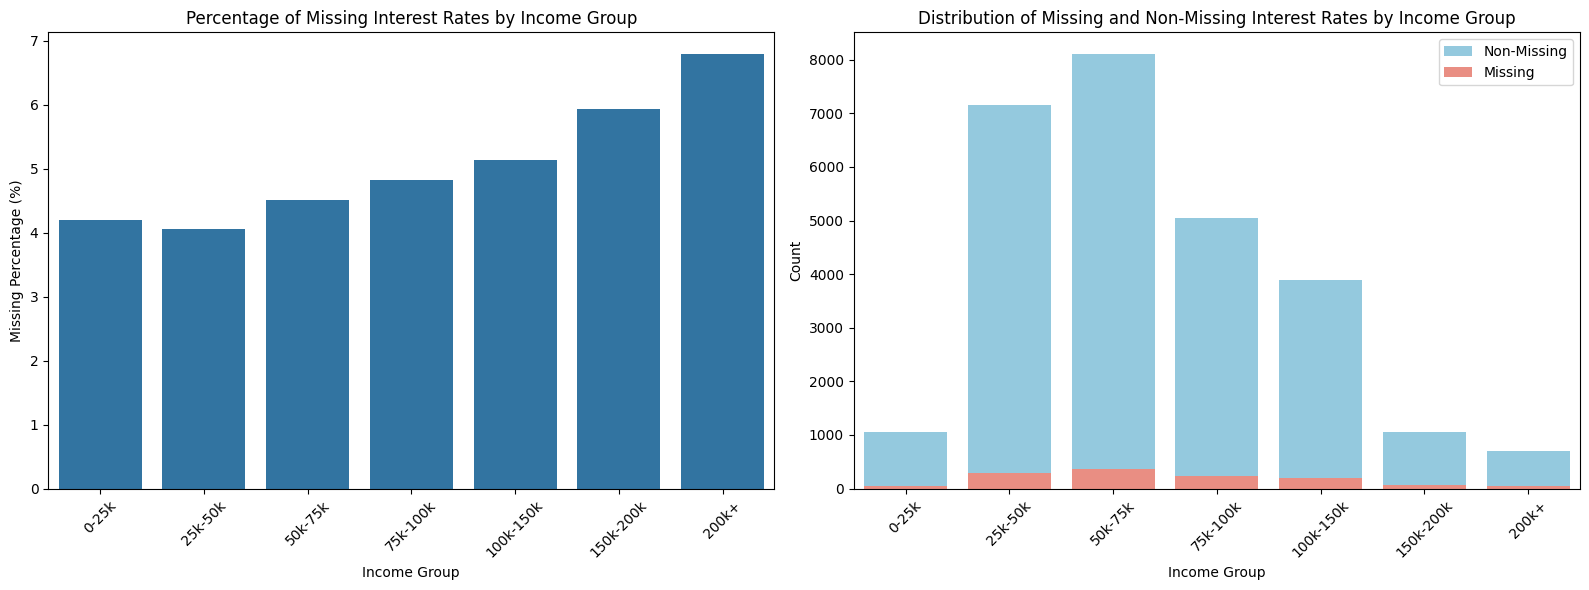

,income_group,Missing_Percentage,Total_Count,Missing_Count,Non-Missing_Count
0,0-25k,4.194471,1049,44,1005
1,25k-50k,4.063111,7162,291,6871
2,50k-75k,4.502837,8106,365,7741
3,75k-100k,4.818560,5043,243,4800
4,100k-150k,5.128205,3900,200,3700
5,150k-200k,5.926623,1063,63,1000
6,200k+,6.789250,707,48,659


In [88]:


# Create income bins and labels
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, df['annual_inc'].max()]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']

# Create income groups
income_groups = pd.cut(df['annual_inc'], bins=income_bins, labels=income_labels, include_lowest=True)

# Calculate missing percentage by income group
missing_by_income = df.groupby(income_groups)['int_rate'].apply(lambda x: x.isnull().mean() * 100)

# Create DataFrame with results
income_analysis = pd.DataFrame({'Missing_Percentage': missing_by_income})
income_analysis.index.name = 'income_group'
income_analysis = income_analysis.reset_index()
income_analysis['Total_Count'] = income_groups.value_counts().sort_index().values
income_analysis['Missing_Count'] = (income_analysis['Missing_Percentage'] / 100 * income_analysis['Total_Count']).astype(int)
income_analysis['Non-Missing_Count'] = income_analysis['Total_Count'] - income_analysis['Missing_Count']

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Bar plot of missing percentages
sns.barplot(x='income_group', y='Missing_Percentage', data=income_analysis, ax=axes[0])
axes[0].set_title('Percentage of Missing Interest Rates by Income Group')
axes[0].set_xlabel('Income Group')
axes[0].set_ylabel('Missing Percentage (%)')
axes[0].tick_params(axis='x', rotation=45, labelrotation=45)

# Stacked bar plot of missing and non-missing counts
sns.barplot(x='income_group', y='Total_Count', data=income_analysis, color='skyblue', label='Non-Missing', ax=axes[1])
sns.barplot(x='income_group', y='Missing_Count', data=income_analysis, color='salmon', label='Missing', ax=axes[1])
axes[1].set_title('Distribution of Missing and Non-Missing Interest Rates by Income Group')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelrotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

# Display results (optional)
income_analysis

The percentage of missing interest rates is relatively consistent, ranging from about 4.19% to 6.79%, across different annual income groups, indicating no strong evidence of a systematic relationship between annual income and the likelihood of missing interest rates. This suggests that varying income amounts have a similar chance of missing interest rate data, and the missingness might be due to random chance rather than being strongly influenced by annual income.

* Analyze the funded amount feature to spot any patterns

C:\Users\DELL\AppData\Local\Temp\ipykernel_11792\1338756451.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_funded_amount = df.groupby(funded_amount_groups)['int_rate'].apply(lambda x: x.isnull().mean() * 100)


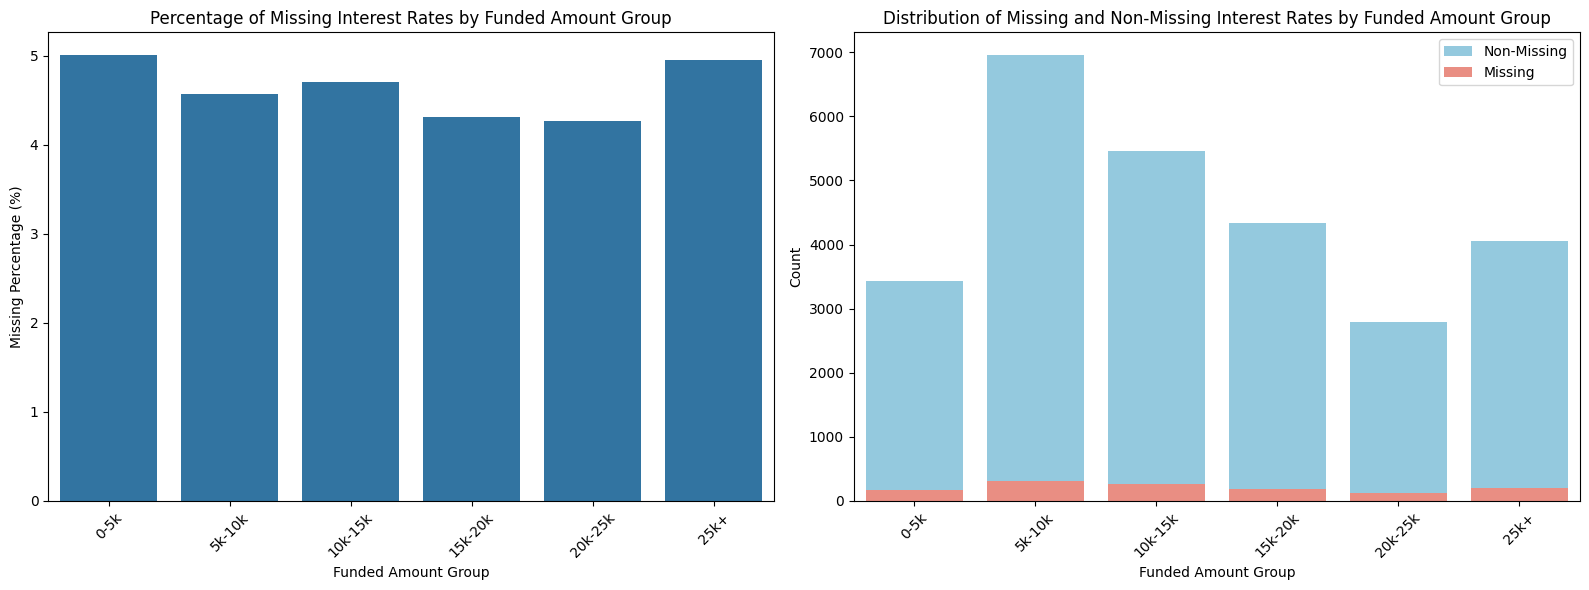

,funded_amount_group,Missing_Percentage,Total_Count,Missing_Count,Non-Missing_Count
0,0-5k,5.014577,3430,172,3258
1,5k-10k,4.566997,6963,318,6645
2,10k-15k,4.708684,5458,257,5201
3,15k-20k,4.315717,4333,187,4146
4,20k-25k,4.271357,2786,119,2667
5,25k+,4.950739,4060,201,3859


In [89]:

# Create funded amount bins and labels
funded_amount_bins = [0, 5000, 10000, 15000, 20000, 25000, df['funded_amount'].max()]
funded_amount_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+']

# Create funded amount groups
funded_amount_groups = pd.cut(df['funded_amount'], bins=funded_amount_bins, labels=funded_amount_labels, include_lowest=True)

# Calculate missing percentage by funded amount group
missing_by_funded_amount = df.groupby(funded_amount_groups)['int_rate'].apply(lambda x: x.isnull().mean() * 100)

# Create DataFrame with results
funded_amount_analysis = pd.DataFrame({'Missing_Percentage': missing_by_funded_amount})
funded_amount_analysis.index.name = 'funded_amount_group'
funded_amount_analysis = funded_amount_analysis.reset_index()
funded_amount_analysis['Total_Count'] = funded_amount_groups.value_counts().sort_index().values
funded_amount_analysis['Missing_Count'] = (funded_amount_analysis['Missing_Percentage'] / 100 * funded_amount_analysis['Total_Count']).astype(int)
funded_amount_analysis['Non-Missing_Count'] = funded_amount_analysis['Total_Count'] - funded_amount_analysis['Missing_Count']

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Bar plot of missing percentages
sns.barplot(x='funded_amount_group', y='Missing_Percentage', data=funded_amount_analysis, ax=axes[0])
axes[0].set_title('Percentage of Missing Interest Rates by Funded Amount Group')
axes[0].set_xlabel('Funded Amount Group')
axes[0].set_ylabel('Missing Percentage (%)')
axes[0].tick_params(axis='x', rotation=45, labelrotation=45)

# Stacked bar plot of missing and non-missing counts
sns.barplot(x='funded_amount_group', y='Total_Count', data=funded_amount_analysis, color='skyblue', label='Non-Missing', ax=axes[1])
sns.barplot(x='funded_amount_group', y='Missing_Count', data=funded_amount_analysis, color='salmon', label='Missing', ax=axes[1])
axes[1].set_title('Distribution of Missing and Non-Missing Interest Rates by Funded Amount Group')
axes[1].set_xlabel('Funded Amount Group')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelrotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

# Display results
funded_amount_analysis

The percentage of missing interest rates is relatively consistent across different funded amount groups, indicating no strong evidence of a systematic relationship between the funded amount and the likelihood of missing interest rates. This suggests that loans with varying funded amounts have a similar chance of missing interest rate data, and the missingness does not appear to be strongly influenced by the funded amount of the loan.

* Analyze the state feature to spot any patterns

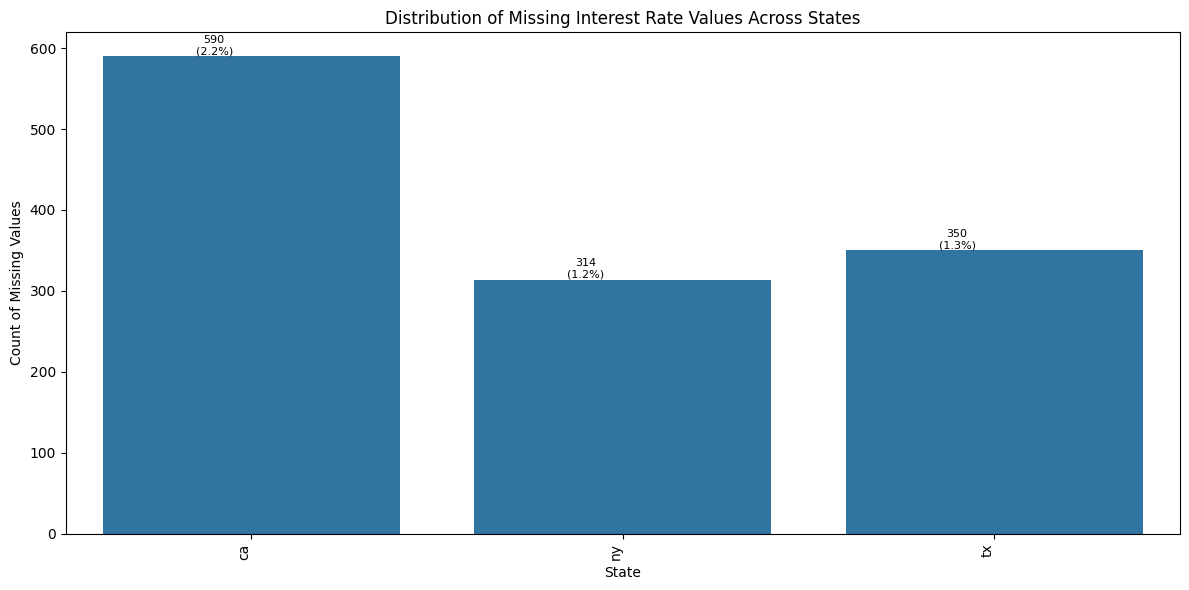

state
ca    590
ny    314
tx    350
Name: int_rate, dtype: int64

In [90]:
# Create a mask for missing values in the 'int_rate' column
int_rate_missing_mask = df['int_rate'].isnull().astype(int)

# Filter the DataFrame using the mask to select only rows with missing 'int_rate'
int_rate_missing_df = df[int_rate_missing_mask == 1]

# Group by 'state_name' and count missing values
missing_counts_by_state = int_rate_missing_df.groupby('state')['int_rate'].size()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x=missing_counts_by_state.index, y=missing_counts_by_state.values)
plt.title('Distribution of Missing Interest Rate Values Across States')
plt.xlabel('State')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Calculate and display percentages and counts
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    count = int(height)  # Get the count as an integer
    annotation_text = f'{count}\n({percentage})'  # Combine count and percentage
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + height
    ax.annotate(annotation_text, (x, y), size=8, ha='center', va='bottom')
plt.tight_layout()
plt.show()

missing_counts_by_state

The missingness in 'int_rate' being related to three specific states suggests a Missing at Random (**MAR**) mechanism, where the probability of missing data depends on observed data, such as the 'state' variable, rather than the missing data itself. This indicates that the missingness is likely associated with specific geographical locations.

In [91]:
def impute_int_rate(df, grade_column='grade_letter', term_column='term', target_column='int_rate'):
    """
    Imputes missing values in the target_column using the mean of its grade_letter, term, and state group
    and stores the original (as 'nan') and imputed values in a CSV lookup table.

    Args:
        df: The pandas DataFrame to modify.
        grade_column: The column containing the grade letter (default: 'grade_letter').
        term_column: The column containing the loan term (default: 'term').
        state_column: The column containing the state (default: 'state').
        target_column: The column to impute (default: 'int_rate').

    Returns:
        The modified DataFrame with imputed values.
    """
    # Calculate mean interest rate for each grade, term, and state group
    grouped_means = df.groupby([grade_column, term_column])[target_column].mean()

    # Create a mask for rows with missing values in the target_column
    missing_mask = df[target_column].isna()

    # Create a lookup table with original and imputed values
    lookup_df = df.loc[missing_mask, [grade_column, term_column, target_column]].copy()  # Include target_column
    lookup_df['imputed_int_rate'] = lookup_df.apply(
        lambda row: grouped_means.get((row[grade_column], row[term_column])), axis=1
    )
    lookup_df.rename(columns={target_column: 'original_int_rate'}, inplace=True)  # Rename original column
    lookup_df.to_csv('lookup_tables/int_rate_imputaion_lookup.csv', index=False, na_rep='nan')
    print("Lookup table saved to int_rate_lookup_by_grade_term_state.csv")

    # Impute missing values directly in the DataFrame
    df.loc[missing_mask, target_column] = df.loc[missing_mask].apply(
        lambda row: grouped_means.get((row[grade_column], row[term_column])), axis=1
    )

    return df
df = impute_int_rate(df)

df['int_rate'].isna().sum()

Lookup table saved to int_rate_lookup_by_grade_term_state.csv


np.int64(0)

### 3- Hanlding missing data in the annual income joint

- In regards to the meta data of this column, there is no missing data here, except there is no joint borrowing.
- In this case, the missingness in annual_inc_joint is related to the underlying application situation 'type' (joint or individual), categorizing it as **MAR**.Because the absence of joint income depends on whether there is a joint borrower or not.
- A new column, **supporting_income**, is introduced: The **calculate_supporting_income** function enhances the dataset by creating a new feature, **supporting_income** This feature is derived by subtracting the individual annual income (annual_inc) from the joint annual income (annual_inc_joint), representing the financial contribution of a co-applicant. The function handles missing joint income values by imputing them as 0, implying no supporting income in those cases. It also generates a lookup table to track these changes before removing the original annual_inc_joint column from the DataFrame.


In [92]:
df['type'].value_counts()

type
individual    25056
joint app      1847
joint            99
direct_pay       28
Name: count, dtype: int64

In [93]:
def calculate_supporting_income(df):
    """
    Calculates supporting income, handles NaN, drops annual_inc_joint,
    and saves changes to a CSV lookup table.

    Args:
        df: The pandas DataFrame to modify.

    Returns:
        The modified DataFrame.
    """
    # Check if 'supporting_income' already exists
    if 'supporting_income' not in df.columns:
        # Create 'supporting_income' column only if it doesn't exist
        df['supporting_income'] = df['annual_inc_joint'] - df['annual_inc']

        # Replace NaN with 0 in 'supporting_income' based on 'annual_inc_joint'
        df['supporting_income'] = df.apply(lambda row: 0 if pd.isnull(row['annual_inc_joint']) else row['supporting_income'], axis=1)

        # Create lookup table
        lookup_df = df[['annual_inc', 'annual_inc_joint', 'supporting_income']].copy()
        lookup_df.to_csv('lookup_tables/supporting_income.csv', index=False)
        print("Lookup table saved to supporting_income.csv")

        # Drop 'annual_inc_joint' column
        df.drop('annual_inc_joint', axis=1, inplace=True)
    else:
        print("'supporting_income' column already exists. Skipping calculation and drop.")

    return df

# Apply the function
df = calculate_supporting_income(df)
df['supporting_income'].head(5)

Lookup table saved to supporting_income.csv


customer_id                                                                                                                                               loan_id
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=                                      7364       0.0
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci                                          46875      0.0
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=          24085      0.0
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn  141865     0.0
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=                                                      98436   

###4- Handling missing data in  Description feature
The description column provides additional context about the loan's purpose assuming the missingness in this column is Missing Completely at Random (**MCAR**). Missing values are imputed using the most frequent (mode) description within each purpose group, ensuring consistency with the loan's stated purpose.

In [94]:
def impute_description(df):
    """
    Imputes missing values in the 'description' column using the mode of
    descriptions grouped by 'purpose'. If no mode exists, the purpose
    value is used as the imputed value. Creates a CSV lookup table to
    track changes.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'description'
                           and 'purpose' columns.

    Returns:
        pd.DataFrame: The modified DataFrame with imputed values in
                      the 'description' column.
    """
    # Calculate the mode of 'description' for each 'purpose' group
    purpose_modes = (
        df.groupby('purpose')['description']
        .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else x.name)
    )

    # Create a mask for missing descriptions
    missing_mask = df['description'].isnull()

    # Create a lookup DataFrame for missing descriptions
    lookup_df = df.loc[missing_mask, ['purpose', 'description']].copy()
    lookup_df['imputed_description'] = lookup_df['purpose'].map(purpose_modes)

    # Fill missing descriptions in the main DataFrame
    df.loc[missing_mask, 'description'] = df.loc[missing_mask, 'purpose'].map(purpose_modes)

    # Save the lookup table to CSV
    lookup_df.to_csv('lookup_tables/description_imputation_lookup.csv', index=False)
    print("Lookup table saved to description_lookup_by_purpose_mode.csv")

    return df
df = impute_description(df)

Lookup table saved to description_lookup_by_purpose_mode.csv


No missing values found in the DataFrame.


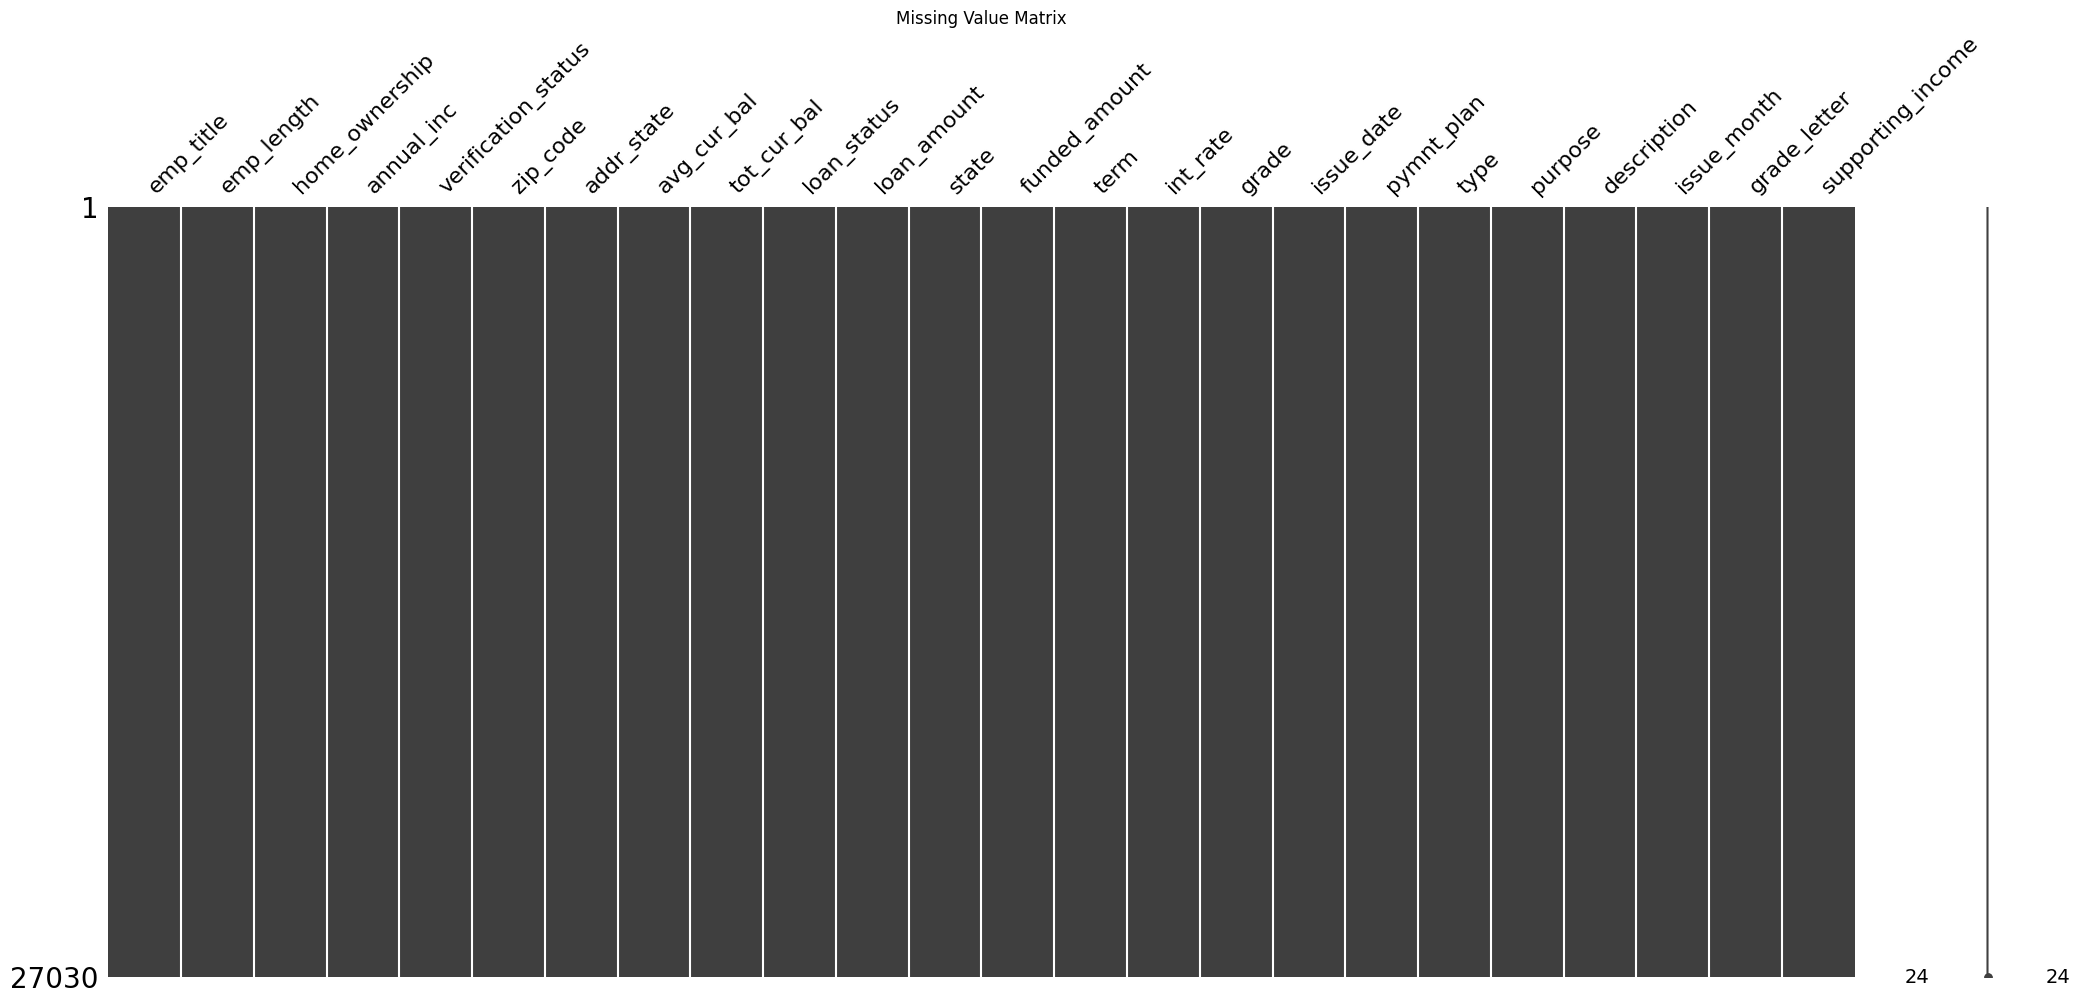

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


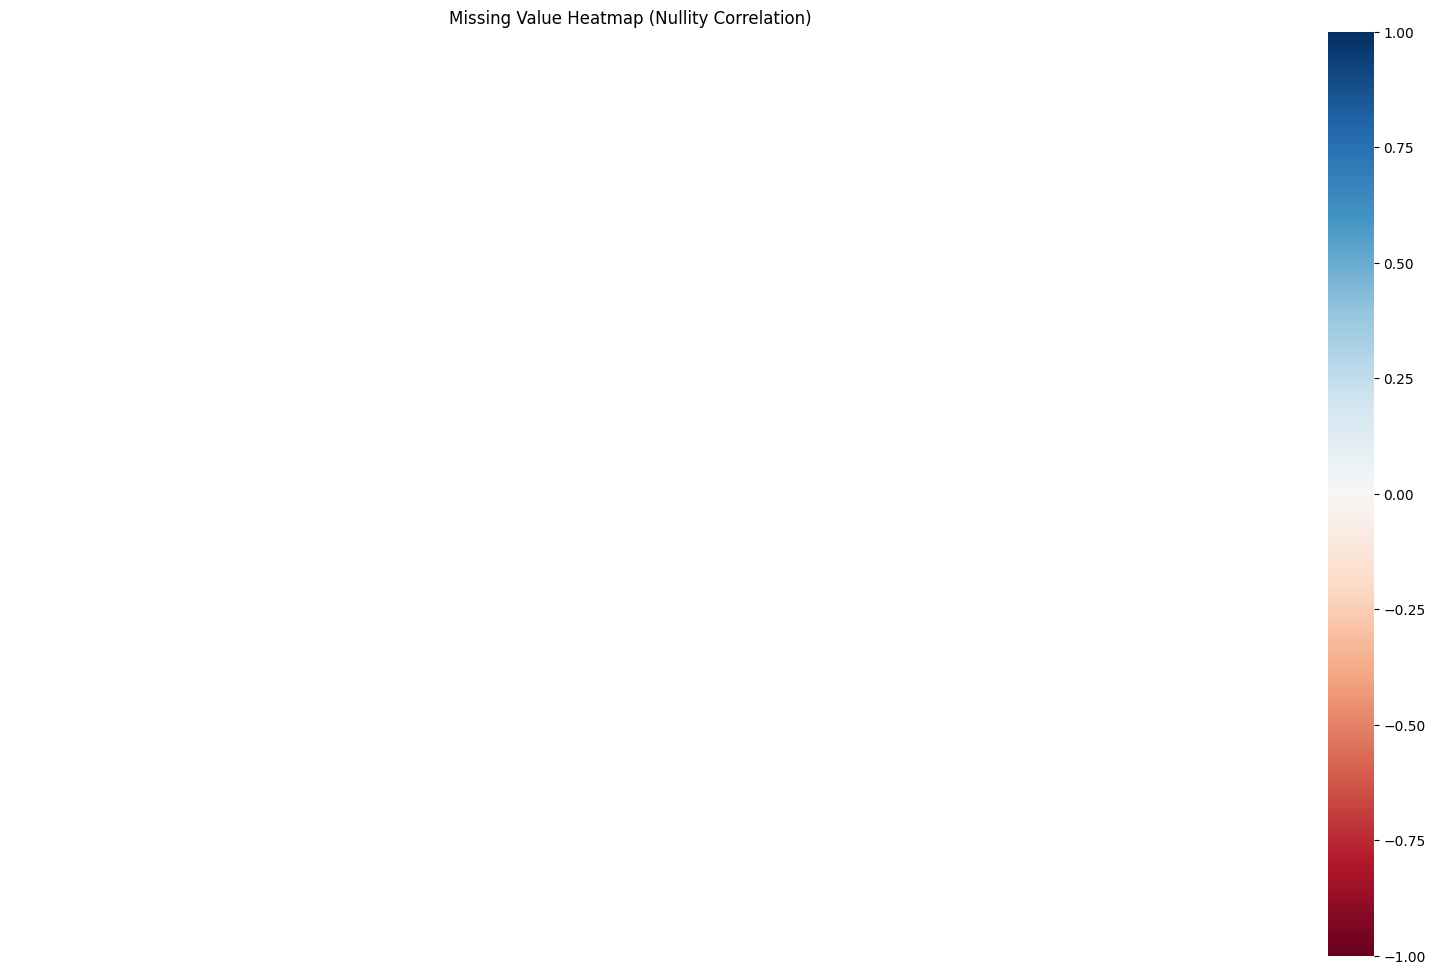

,Missing Values,Percentage


In [95]:
check_missing_values(df)

# **Bonus Task** :
Enrich the DataFrame by adding a new column named 'state_name' that contains the corresponding full names of the states.

In [96]:
def add_state_names(df, states_path='data/states.csv'):
    """
    Adds a column with full state names to the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing a column 'state' with state abbreviations.
        states_path (str): Path to a CSV file containing state names as backup.

    Returns:
        pd.DataFrame: DataFrame with an additional 'state_name' column.
    """
    try:
        # 1. Fetch state data from Statistics Canada
        statcan_url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"
        statcan_df = pd.read_html(statcan_url)[0]
        statcan_df.columns = ['Code', 'State', 'Abbreviation', 'Alpha code']
        statcan_lookup = dict(zip(statcan_df['Alpha code'], statcan_df['State']))

        # 2. Convert 'state' column values to uppercase
        df['state'] = df['state'].str.upper()

        # 3. Map state abbreviations to full names
        df['state_name'] = df['state'].map(statcan_lookup)

    except Exception as e:
        print(f"Error fetching data from URL: {e}")
        print(f"Using backup CSV file: {states_path}")

        # If fetching data from Statistics Canada fails, 
        # use the backup CSV file to ensure state names are added using local data.
        # Load state names from the backup CSV file
        states_df = pd.read_csv(states_path)
        state_lookup = dict(zip(states_df['code'], states_df['name']))  # Create a lookup dictionary

        # Convert 'state' column to uppercase and map using backup data
        df['state'] = df['state'].str.upper()
        df['state_name'] = df['state'].map(state_lookup)

    finally:  # Always execute this block
        # 4. Save the lookup results
        df[['state', 'state_name']].to_csv('lookup_tables/state_names_lookup.csv', index=False)
        print("State names added to DataFrame and saved to state_names_lookup.csv")
        return df

# usage:
df = add_state_names(df)

State names added to DataFrame and saved to state_names_lookup.csv


In [97]:
df['state_name'].head()

customer_id                                                                                                                                               loan_id
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=                                      7364            Nevada
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci                                          46875         New York
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=          24085         Illinois
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn  141865     Connecticut
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=                              

# **Data Transformation and Feature Engineering:**
- some of its task are done ealier in the data cleaning section such as


*   Month number: is done in ( Standardize_issue_date) function  
*   Letter Grade : is done in ( transform_grade_to_letter ) function



In [98]:
# @title calculate_monthly_installment and adding new featrue 'Salary Can Cover'
def calculate_monthly_installment(df, P='funded_amount', term_column='term'):

    """
    Calculates the monthly installment amount for each loan based on the provided
    principal, interest rate, and term. Additionally, it determines if the borrower's
    annual income is sufficient to cover the yearly loan payments.

    Args:
        df: The input DataFrame containing loan details.
        P: The loan principal/amount (funded amount).
        term_column: The column name containing the term of the loan in months.

    Returns:
        pd.DataFrame: The DataFrame with an added 'monthly_installment' column.
    """
    # Extract term in months from the term column (e.g., '36 months' -> 36)
    df['term_in_months'] = df[term_column].str.extract(r'(\d+)').astype(int)

    # Calculate monthly interest rate
    df['monthly_interest_rate'] = df['int_rate'] / 12

    # Calculate monthly installment
    df['monthly_installment'] = df.apply(
        lambda row: (
            row[P] * row['monthly_interest_rate'] * (1 + row['monthly_interest_rate']) ** row['term_in_months']
        ) / (
            (1 + row['monthly_interest_rate']) ** row['term_in_months'] - 1
        ) if row['monthly_interest_rate'] > 0 else row[P] / row['term_in_months'],
        axis=1
    )
    # Add 'Salary Can Cover' column
    df['salary_can_cover'] = (df['annual_inc'] >= df['monthly_installment'] * 12)

    # Drop the helper columns if not needed
    df.drop(columns=['monthly_interest_rate', 'term_in_months'], inplace=True)

    return df

df = calculate_monthly_installment(df)

In [99]:
df[['salary_can_cover','monthly_installment', 'funded_amount', 'int_rate', 'term']]

,,salary_can_cover,monthly_installment,funded_amount,int_rate,term
customer_id,loan_id,,,,,
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=,7364,True,83.179133,2500.0,0.1212,36 months
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci,46875,True,149.987905,6000.0,0.1727,60 months
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=,24085,True,164.262519,4800.0,0.1409,36 months
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn,141865,True,479.111808,14400.0,0.1212,36 months
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=,98436,True,363.986783,10000.0,0.1849,36 months
...,...,...,...,...,...,...
yidzkz9cede3pencedflryhcedllxhhimt5dxhhlnvx4zjq5xhgxmlx4ogvcegflxhhiy1x4ztdcegyyxhgwyzbceguzxhgxnfx4odrcedk5l1x4yjjcegi0iyc=,135397,True,291.695962,13200.0,0.1171,60 months
yidcdf9cegizt0s1xhg4mfx4ogfbxhhhzlx4zmzbyu9hxhhinmfcedg4xhhkzlx4zthcegiwmlx4odfcegu1wvx4owzcedk2xhhin1x4zgzuxhhiy1x4odkn,185084,True,424.285036,19200.0,0.1171,60 months
yidnxhgwyzd0xhhjzx5axhhlofx4ywvcegu2xhhhy1x4otbcegviylx4ymfzr1x4mdn4zmtwxldcege0xhhiovx4y2vcedk5x0fcegi5xhhmyic=,216999,True,845.191345,24000.0,0.1612,36 months


In [100]:
salary_can_cover_counts = df['salary_can_cover'].value_counts()
salary_can_cover_percentages = df['salary_can_cover'].value_counts(normalize=True) * 100
salary_can_cover_df = pd.DataFrame({'count': salary_can_cover_counts, 'proportion': salary_can_cover_percentages}) # Create DataFrame using a dictionary to map column names to data
# Display the percentages
salary_can_cover_df

,count,proportion
salary_can_cover,,
True,27008,99.918609
False,22,0.081391


In [101]:
salary_cannot_cover = df[df['salary_can_cover']==False]
salary_cannot_cover.groupby('loan_status')['loan_status'].value_counts()

loan_status
charged off     1
current        19
fully paid      2
Name: count, dtype: int64

# **EDA:**

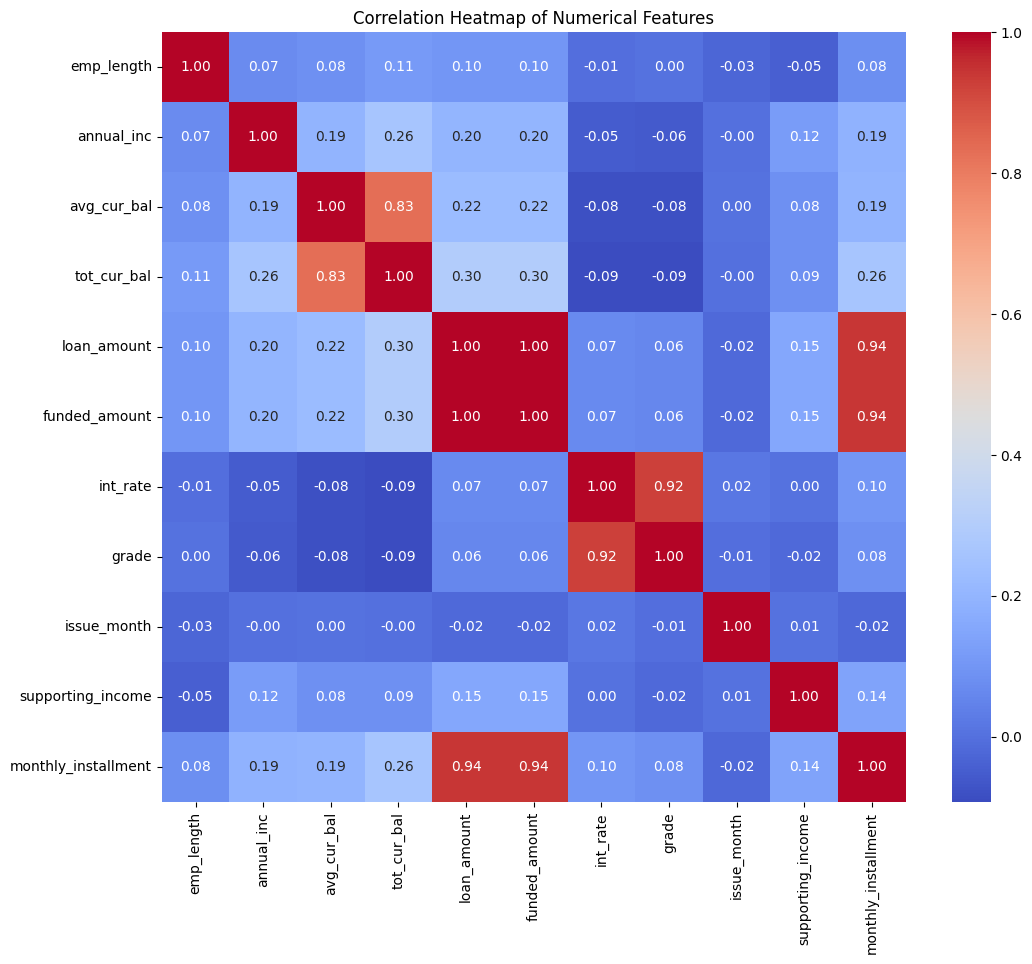

Correlation between avg_cur_bal and tot_cur_bal: 0.8311402468226281
Correlation between loan_amount and funded_amount: 1.0
Correlation between loan_amount and monthly_installment: 0.9434686448884979
Correlation between funded_amount and monthly_installment: 0.9434686448884979
Correlation between int_rate and grade: 0.9235397925459702


In [102]:
# Calculate and visualize correlations between numerical features.
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

import itertools

# Get a list of numerical columns
numerical_cols = numerical_df.columns.tolist()

# Iterate through unique column combinations
for col1, col2 in itertools.combinations(numerical_cols, 2):
    correlation_value = df[col1].corr(df[col2])

    if abs(correlation_value) > 0.5:
        print(f"Correlation between {col1} and {col2}: {correlation_value}")

##**How have customer count and average funded amount changed over time?**

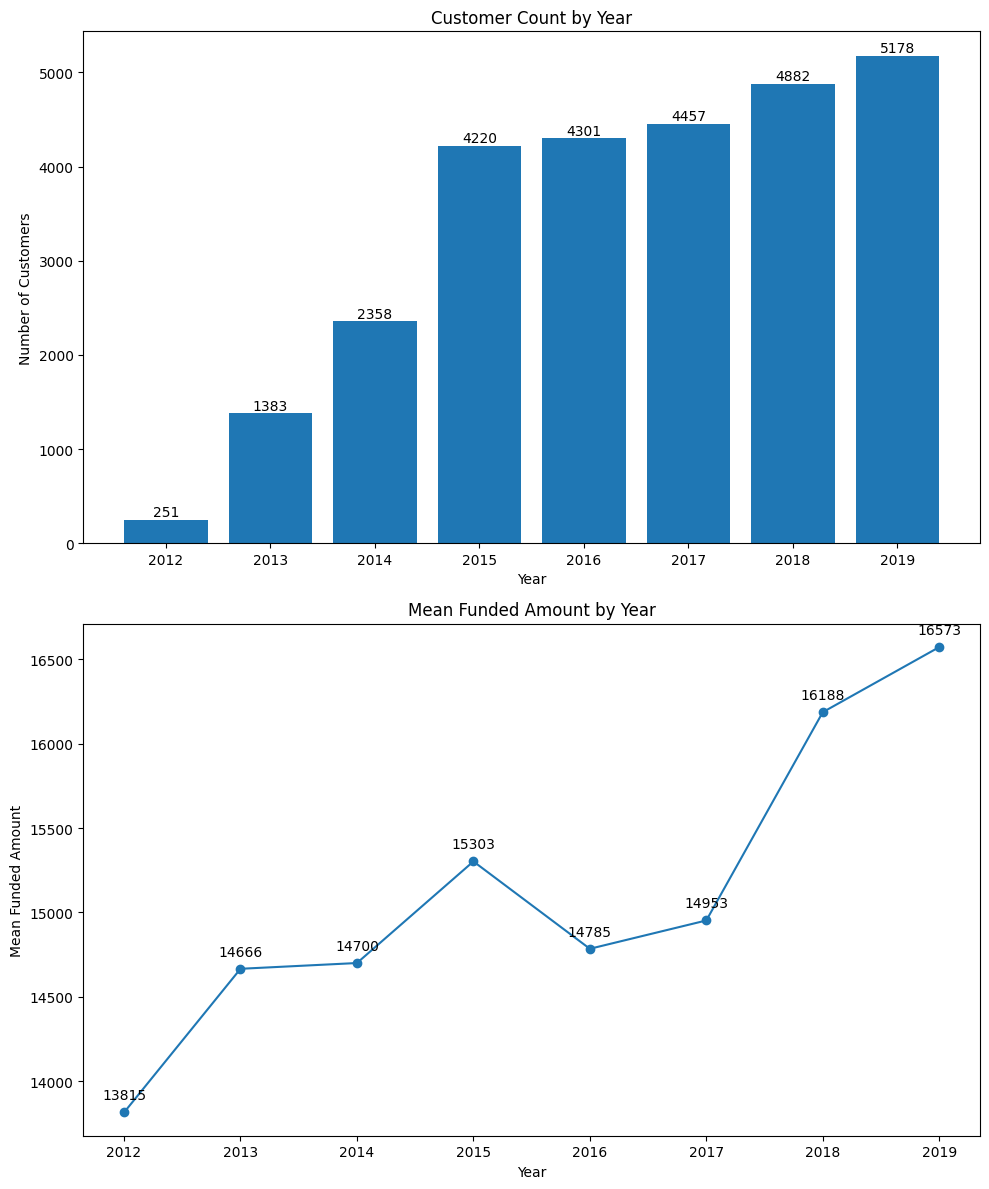

In [103]:
# Extract year from 'issue_date'
df['issue_year'] = df['issue_date'].dt.year

# Group by year and count unique customers
customer_counts_by_year = df.groupby(['issue_year']).size()

# Group by year and calculate mean of account funded
mean_funded_by_year = df.groupby(['issue_year'])['funded_amount'].mean()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column

# Customer Count Subplot
axes[0].bar(customer_counts_by_year.index, customer_counts_by_year.values)
axes[0].set_title('Customer Count by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=0)  # Keep x-axis labels horizontal

# Add number labels to the bars
for i, v in enumerate(customer_counts_by_year.values):
    axes[0].text(customer_counts_by_year.index[i], v + 5, str(v), ha='center', va='bottom')

# Mean Funded Amount Subplot
axes[1].plot(mean_funded_by_year.index, mean_funded_by_year.values, marker='o')
axes[1].set_title('Mean Funded Amount by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Mean Funded Amount')
axes[1].tick_params(axis='x', rotation=0)  # Keep x-axis labels horizontal

# Add number labels to the line plot
for i, v in enumerate(mean_funded_by_year.values):
    axes[1].text(mean_funded_by_year.index[i], v + 60, f'{v:.0f}', ha='center', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Why did the mean funded amount experience a significant drop in 2016 despite the customer count remaining consistent with 2015?

In [104]:
# Group data by purpose and year, then calculate mean funded amount
purpose_funding_by_year = df.groupby(['purpose', 'issue_year'])['funded_amount'].mean().unstack()

# Display the summary DataFrame
purpose_funding_by_year

issue_year,2012,2013,2014,2015,2016,2017,2018,2019
purpose,,,,,,,,
car,3350.000000,7898.076923,6556.818182,9332.031250,9266.836735,8096.568627,9493.518519,11466.279070
credit_card,14855.000000,14831.671348,15310.861423,16057.852883,15390.747126,14963.597430,15363.571429,16363.590720
debt_consolidation,14596.774194,15655.449507,15244.051724,15993.198893,15812.220224,16118.161526,17429.675908,17738.096948
home_improvement,12832.500000,13134.848485,14387.090164,13691.094421,13516.152597,14789.398281,16019.166667,16383.358209
house,5175.000000,18555.000000,11666.666667,13084.375000,14544.117647,15187.500000,16247.685185,12765.816327
major_purchase,12133.333333,9820.454545,11370.625000,11870.422535,11136.436170,12949.166667,14905.555556,10588.782051
medical,6383.333333,7316.666667,8657.142857,9113.888889,10088.953488,11514.285714,11454.225352,11472.014925
moving,16508.333333,6575.000000,5800.000000,7203.225806,8653.333333,8124.218750,9915.540541,11232.692308
other,10339.285714,9239.035088,10470.758929,10508.136792,9907.142857,10507.595870,13103.349673,11997.849462


As shown in the table above, funding for 'renewable energy' begins in 2014, while funding for 'wedding' ends in the same year.

In [105]:
# Filter data for 2015 and 2016
df_2015 = df[df['issue_year'] == 2015]['funded_amount'].describe()
df_2016 = df[df['issue_year'] == 2016]['funded_amount'].describe()

# Create a DataFrame with two columns
summary_df = pd.DataFrame({'2015': df_2015, '2016': df_2016})

# Display the DataFrame
summary_df

,2015,2016
count,4220.000000,4301.000000
mean,15302.665877,14784.811672
std,8527.722958,8941.230141
min,1000.000000,1000.000000
25%,9000.000000,8000.000000
50%,14000.000000,12575.000000
75%,20000.000000,20000.000000
max,35000.000000,40000.000000


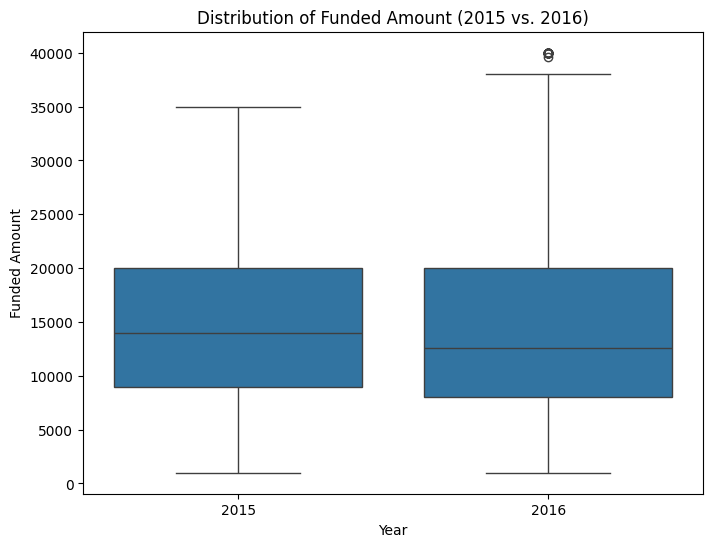

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='issue_year', y='funded_amount', data=df[(df['issue_year'] == 2015) | (df['issue_year'] == 2016)])
plt.title('Distribution of Funded Amount (2015 vs. 2016)')
plt.xlabel('Year')
plt.ylabel('Funded Amount')
plt.show()

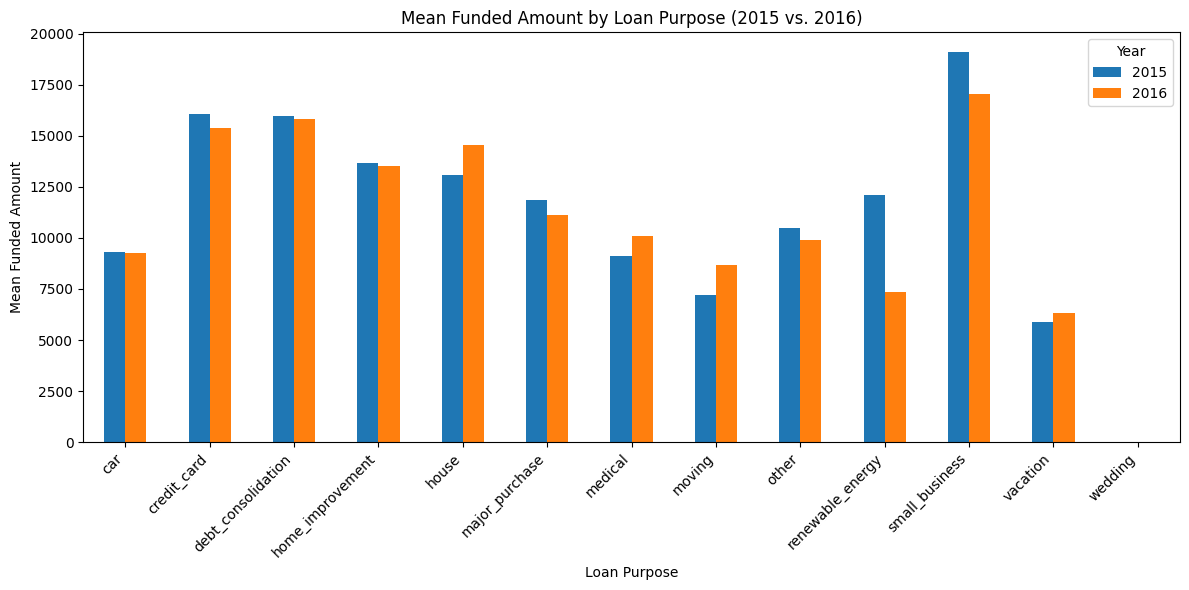

In [107]:
# Group data by loan purpose and year, then calculate mean funded amount
purpose_funding_by_year = df.groupby(['purpose', 'issue_year'])['funded_amount'].mean().unstack()

# Filter data for 2015 and 2016
purpose_funding_2015_2016 = purpose_funding_by_year[[2015, 2016]]  # Select only 2015 and 2016 columns

# Create a bar plot
purpose_funding_2015_2016.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Funded Amount by Loan Purpose (2015 vs. 2016)')
plt.xlabel('Loan Purpose')
plt.ylabel('Mean Funded Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Year')
plt.tight_layout()
plt.show()

The visualization indicates that the primary driver of the overall decrease in funding is the significant decline in allocations for 'renewable energy' and 'small businesses,' while funding for other purposes has remained relatively stable.



## **What is the distribution of loan statuses within the dataset?**

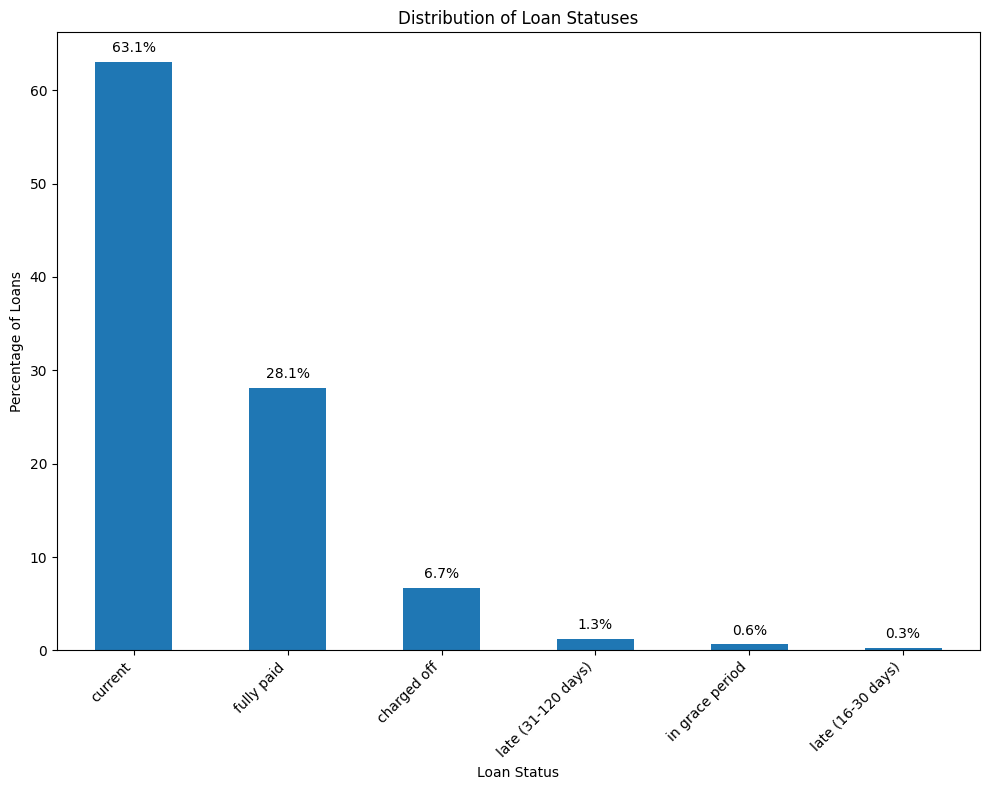

In [108]:

# Calculate loan status values percentages
loan_st_perc = df['loan_status'].value_counts(normalize=True) * 100 # (normalize=True) essentially converts the counts into percentages.

# Sort percentages in descending order
loan_st_perc = loan_st_perc.sort_values(ascending=False)

# Create bar chart
ax = loan_st_perc.plot(kind='bar', figsize=(10, 8))
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Percentage of Loans')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.tight_layout()
plt.show()

We discovered that approximately 7% of the population is in a charged-off status, a significant indicator of financial unreliability. To address this, creditors may need to conduct further analysis to better understand the underlying causes, enhance their loan security measures, and work toward reducing this percentage effectively

In [109]:
# Count the occurrences of 'charged off' in the 'loan_status' column
charged_count = (df['loan_status'] == 'charged off').sum()
print(f"There are {charged_count} 'charged off' loans.")



There are 1812 'charged off' loans.


In [110]:
# Filter the DataFrame for charged off loans
charged_off_mask = df[df['loan_status'] == 'charged off']

# Analyze salary coverage for charged-off loans
salary_coverage_analysis = charged_off_mask['salary_can_cover'].value_counts()

# Calculate percentages
salary_coverage_percentages = charged_off_mask['salary_can_cover'].value_counts(normalize=True) * 100

# Create a table with two columns: one for the value counts of salary coverage for charged-off loans and another for the corresponding percentages.
salary_coverage_df = pd.DataFrame({'Count': salary_coverage_analysis, 'Percentage': salary_coverage_percentages})

# Display the results
print(salary_coverage_df)



                  Count  Percentage
salary_can_cover                   
True               1811   99.944812
False                 1    0.055188


In [111]:
charged_off_mask.nunique()

emp_title              1197
emp_length               13
home_ownership            3
annual_inc              446
verification_status       3
zip_code                546
addr_state               49
avg_cur_bal            1707
tot_cur_bal            1806
loan_status               1
loan_amount             445
state                    49
funded_amount           445
term                      2
int_rate                268
grade                    35
issue_date               80
pymnt_plan                1
type                      4
purpose                  12
description             127
issue_month              12
grade_letter              7
supporting_income        34
state_name               49
monthly_installment    1612
salary_can_cover          2
issue_year                8
dtype: int64

In [112]:
# Calculate the mean interest rate for charged off loans
mean_int_rate_charged_off = charged_off_mask['int_rate'].mean()
print(f"The mean interest rate for charged-off loans is: {mean_int_rate_charged_off:.2f}")

#the mean of grade
mean_grade_charged_off = charged_off_mask['grade'].mean()
print(f"The mean grade for charged-off loans is: {mean_grade_charged_off:.2f}")

# the mode of grade letter
mode_grade_letter_charged_off = charged_off_mask['grade_letter'].mode()[0]
print(f"The mode grade letter for charged-off loans is: {mode_grade_letter_charged_off}")


The mean interest rate for charged-off loans is: 0.16
The mean grade for charged-off loans is: 15.53
The mode grade letter for charged-off loans is: C


Analyzing the unique values of charged-off loans reveals diverse characteristics across loan amounts, terms, interest rates, and borrower demographics, with no single factor clearly driving charge-offs. The mean interest rate (16%), mean grade (15.53), and mode grade letter ('C') fall near the middle of their respective distributions, indicating that charge-offs are not limited to high-risk segments but occur across a broader range of loans. This suggests that charge-offs result from a combination of factors rather than any single attribute.Definitive reason behind the charge-offs. Further investigation and potentially more advanced analytical techniques would be needed to uncover any underlying patterns or contributing factors.

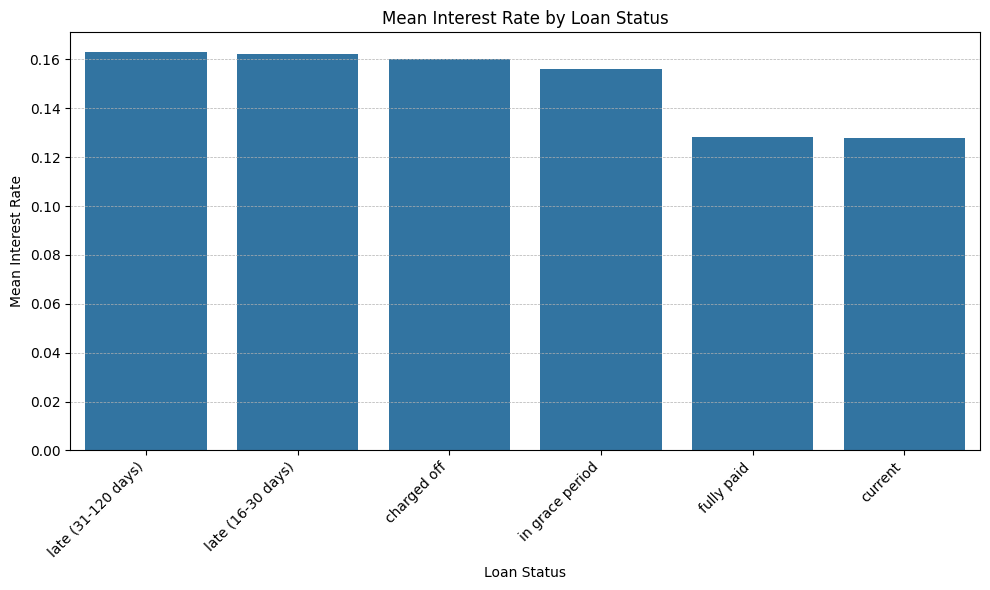

In [113]:
# Calculate the mean of 'int_rate' for each 'loan_status' group
mean_int_rate_by_status = df.groupby('loan_status')['int_rate'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_int_rate_by_status.index, y=mean_int_rate_by_status.values)
plt.title('Mean Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Mean Interest Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

While average interest rates are broadly similar across loan statuses, fully paid and current loans have the lowest rates.

<Figure size 1200x800 with 0 Axes>

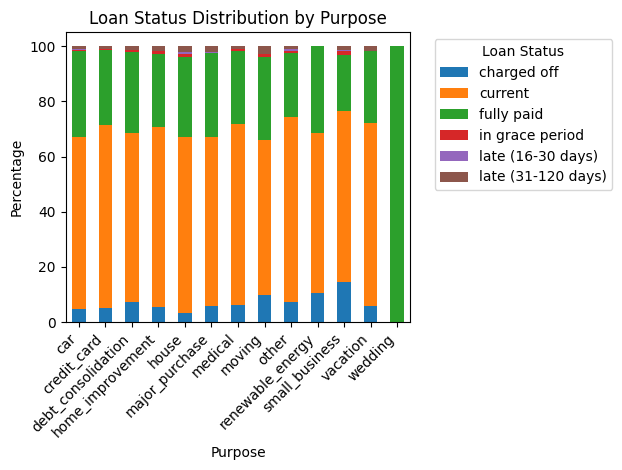

In [114]:
# Group by purpose and loan status, then count occurrences
loan_purpose_status = df.groupby(['purpose', 'loan_status'])['loan_status'].count().unstack()

# Calculate percentages for stacking
loan_purpose_status_percent = loan_purpose_status.div(loan_purpose_status.sum(axis=1), axis=0) * 100

# Create the stacked bar chart using Seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
loan_purpose_status_percent.plot(kind='bar', stacked=True)
plt.title('Loan Status Distribution by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Move legend outside the plot
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The majority of loan purposes are linked to "current" or "fully paid" statuses, while "charged-off" loans exhibit significant variation. Notably, over 15% of small business loans end up charged-off. In contrast, every loan taken for a wedding is fully repaid.

## **What is the distribution of Home ownership within the dataset?**

C:\Users\DELL\AppData\Local\Temp\ipykernel_11792\713861555.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='home_ownership', data=df, order=df['home_ownership'].value_counts().index, palette="viridis")


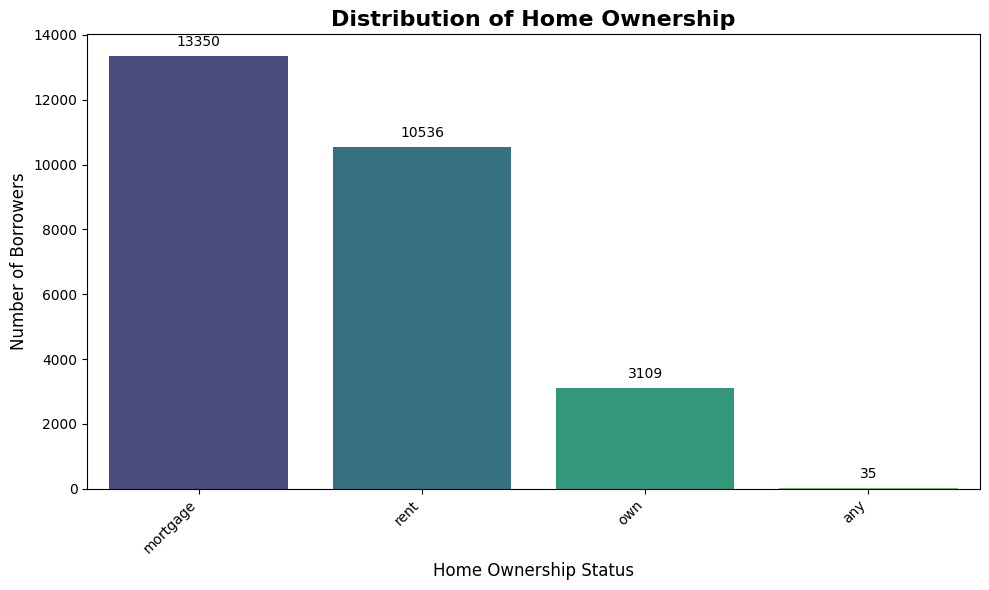

                Count  Percentage
home_ownership                   
mortgage        13350   49.389567
rent            10536   38.978912
own              3109   11.502035
any                35    0.129486


In [115]:
# Calculate the distribution of home ownership
homeownership_counts = df['home_ownership'].value_counts()

# Calculate percentages
homeownership_percentages = (homeownership_counts / len(df)) * 100

# Create a DataFrame
homeownership_distribution = pd.DataFrame({
    'Count': homeownership_counts,
    'Percentage': homeownership_percentages
})

# Create the countplot for home ownership
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = sns.countplot(x='home_ownership', data=df, order=df['home_ownership'].value_counts().index, palette="viridis")

# Add title and labels with improved formatting
plt.title('Distribution of Home Ownership', fontsize=16, fontweight='bold')
plt.xlabel('Home Ownership Status', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels to the bars for better clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)


plt.tight_layout()
plt.show()
print(homeownership_distribution)

Approximately half of the customers report living in mortgaged houses, followed by those who rent (39.0%) and those who own their homes outright (11.5%), while a small fraction falls under the 'any' category (0.1%).

C:\Users\DELL\AppData\Local\Temp\ipykernel_11792\3084786291.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_income_by_homeownership.index, y=avg_income_by_homeownership.values, palette="viridis")


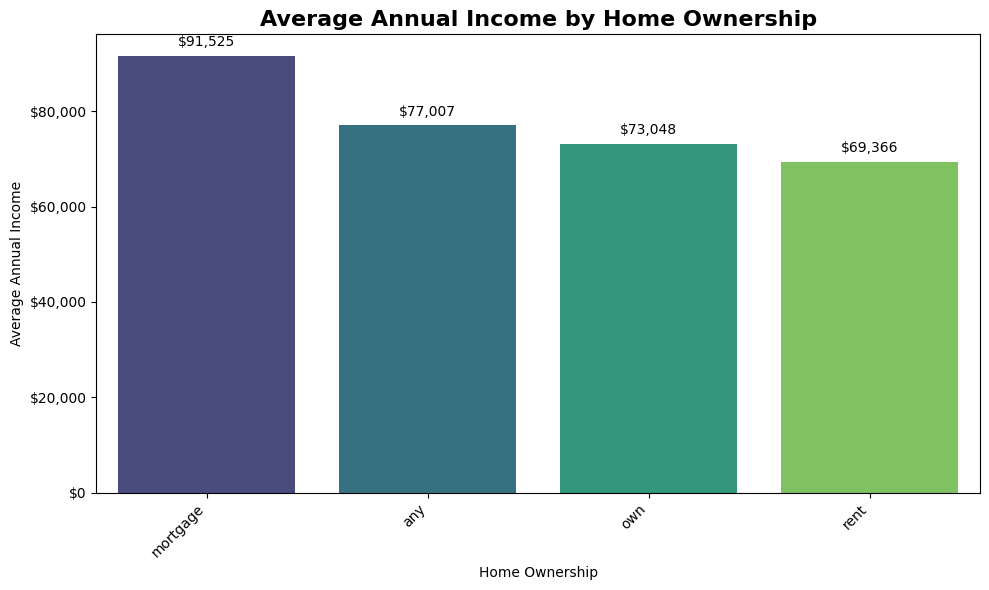

home_ownership
mortgage    91524.858873
any         77007.000000
own         73047.794483
rent        69365.785217
Name: annual_inc, dtype: float64


In [116]:


# Calculate average annual income by home ownership
avg_income_by_homeownership = df.groupby('home_ownership')['annual_inc'].mean().sort_values(ascending=False)

# Create a bar plot
import matplotlib.ticker as mtick
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = sns.barplot(x=avg_income_by_homeownership.index, y=avg_income_by_homeownership.values, palette="viridis")
plt.title('Average Annual Income by Home Ownership', fontsize=16, fontweight='bold')
plt.xlabel('Home Ownership')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars for better clarity with dollar sign
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Format y-axis labels with dollar sign
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))


plt.tight_layout()
plt.show()

# Print the average annual income by home ownership
print(avg_income_by_homeownership)

"Interestingly, despite its tiny representation, the 'ANY' category holds the second-highest average annual income (77,007), surpassing both homeowners (73,048) and renters (69,366)."


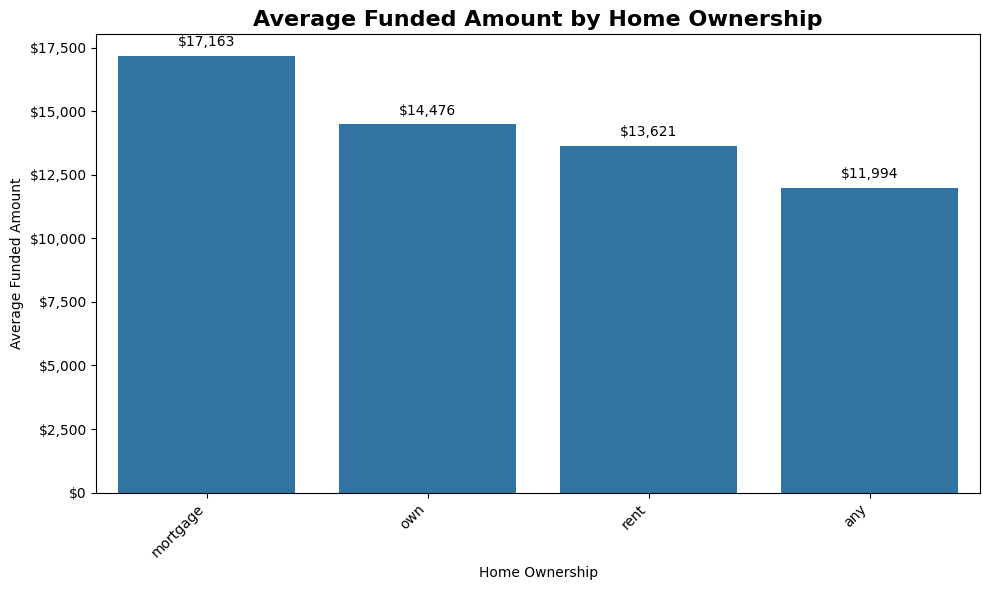

home_ownership
mortgage    17163.359551
own         14476.358958
rent        13621.146545
any         11994.285714
Name: funded_amount, dtype: float64


In [117]:
# Calculate average funded amount by home ownership
avg_funded_by_homeownership = df.groupby('home_ownership')['funded_amount'].mean().sort_values(ascending=False)

# Create a bar plot
import matplotlib.ticker as mtick
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_funded_by_homeownership.index, y=avg_funded_by_homeownership.values)
plt.title('Average Funded Amount by Home Ownership', fontsize=16, fontweight='bold')
plt.xlabel('Home Ownership')
plt.ylabel('Average Funded Amount')
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars for better clarity with dollar sign
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Format y-axis labels with dollar sign
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

# Print the average funded amount by home ownership
print(avg_funded_by_homeownership)

When it comes to funded loans, those with mortgages lead the way with an average of 17,163, followed by homeowners at 14,476, renters at 13,621, and the 'ANY' category trailing at 11,994 despite their higher-than-expected average income.

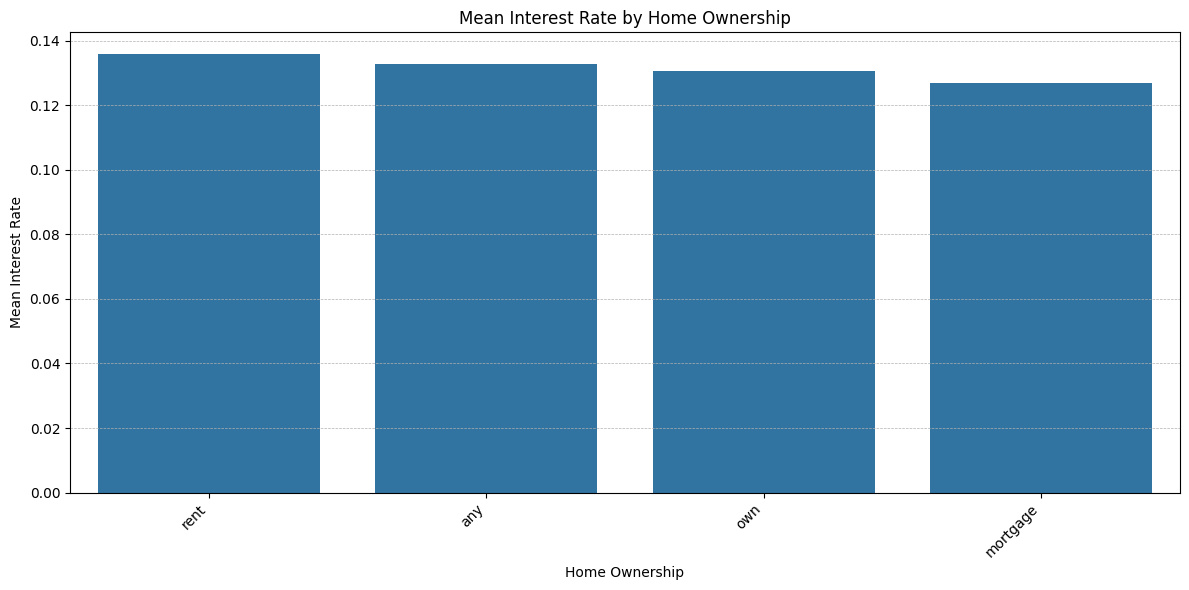

In [118]:
# Calculate the mean interest rate for each home ownership category
mean_int_rate_by_homeownership = df.groupby('home_ownership')['int_rate'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='home_ownership', y='int_rate', data=mean_int_rate_by_homeownership.reset_index())
plt.title('Mean Interest Rate by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Mean Interest Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

The average rate of interest for all forms of homeownership is fairly similar.

## **What is the distribution of states in the dataset with respect to the number of customers, their average annual income, and the average funded amount?**

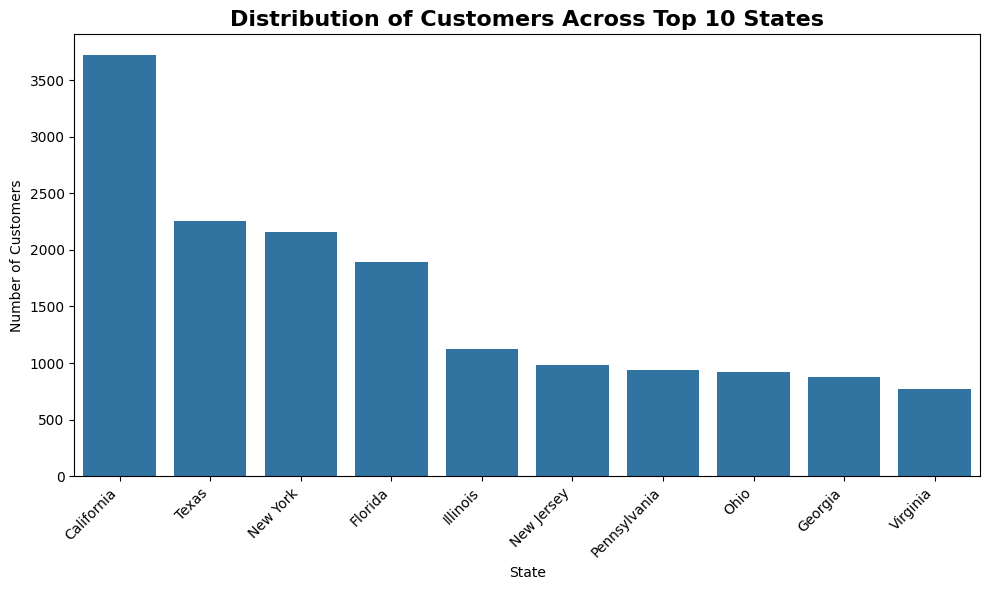

              Count  Percentage
state_name                     
California     3718   13.755087
Texas          2253    8.335183
New York       2161    7.994821
Florida        1895    7.010729
Illinois       1124    4.158343
New Jersey      979    3.621902
Pennsylvania    936    3.462819
Ohio            925    3.422124
Georgia         876    3.240844
Virginia        767    2.837588


In [119]:
# calculate the states counts
state_counts = df['state_name'].value_counts().nlargest(10).sort_values(ascending=False)

# calculate the percentage
state_percentages = (state_counts / len(df)) * 100

# Create a DataFrame
state_distribution = pd.DataFrame({
    'Count': state_counts,
    'Percentage': state_percentages
})

# plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=state_distribution.index, y=state_distribution['Count'])
plt.title('Distribution of Customers Across Top 10 States', fontsize=16, fontweight='bold')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
print(state_distribution)

California, Texas, and New York are the top three states with the most customers, comprising approximately 30% of the total customer base. The remaining seven states, contribute nearly  another  30%, resulting in these ten states representing approximately 60% of all customers. This significant customer concentration highlights the importance of these states in the overall customer distribution.

Overall average annual income: $80,743.46

State Income Category Counts:
Below Avg: 36 (70.59%)
Above Avg: 15 (29.41%)


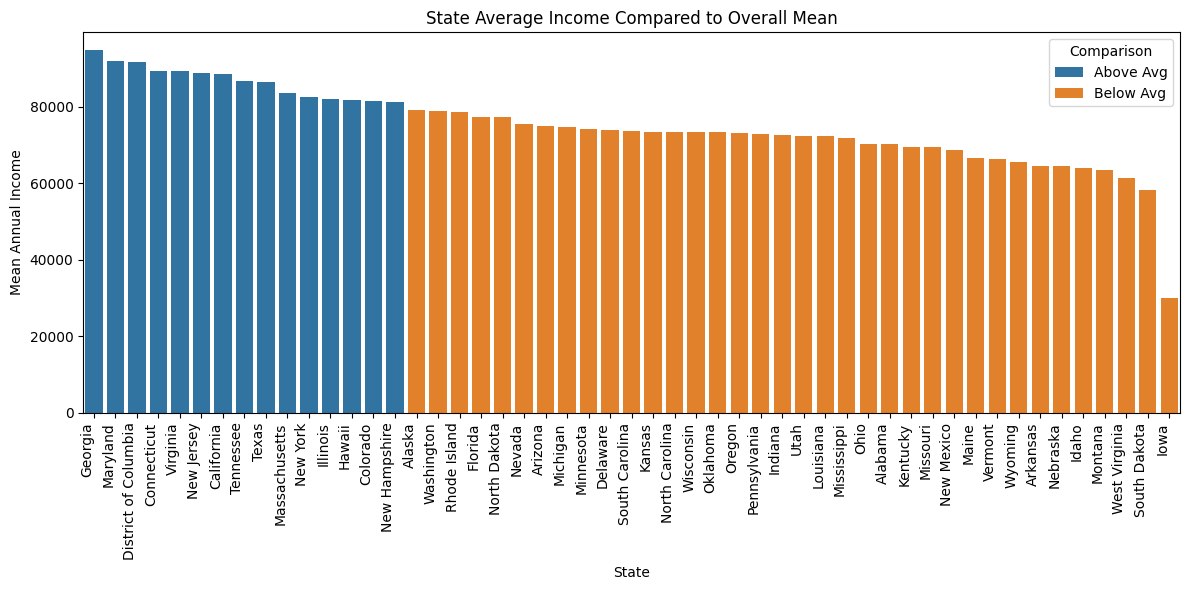

In [120]:
# Calculate the overall average annual income across all states.
overall_mean = df['annual_inc'].mean()
print(f"Overall average annual income: ${overall_mean:,.2f}")

# Calculate and categorize state average incomes
state_incomes = df.groupby('state_name')['annual_inc'].mean().sort_values(ascending=False)
state_comparison = state_incomes.apply(
    lambda x: "Above Avg" if x > overall_mean else ("Avg" if x == overall_mean else "Below Avg")
)

# Create summary DataFrame
summary_income_df = pd.DataFrame({
    'State': state_comparison.index,
    'Avg Income': state_incomes,
    'Comparison': state_comparison.values
})

# Count states in each category and calculate percentages
category_counts = summary_income_df['Comparison'].value_counts()
category_percentages = summary_income_df['Comparison'].value_counts(normalize=True) * 100

print("\nState Income Category Counts:")
for category, count in category_counts.items():
    percentage = category_percentages[category]
    print(f"{category}: {count} ({percentage:.2f}%)")

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Avg Income', hue='Comparison', data=summary_income_df)
plt.title('State Average Income Compared to Overall Mean')
plt.xlabel('State')
plt.ylabel('Mean Annual Income')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

The overall average annual income across all states in the dataset is $80,700. However, there is variation in average income at the state level. A majority of states (36 states, representing 70.59%) have an average annual income below the overall average, while 15 states (29.41%) have an average annual income above the overall average. This indicates that income levels tend to be lower than this average in most states.

Overall average funded amount: $15,466.89

State Funded Amount Category Counts:
Below Avg: 31 (60.78%)
Above Avg: 20 (39.22%)


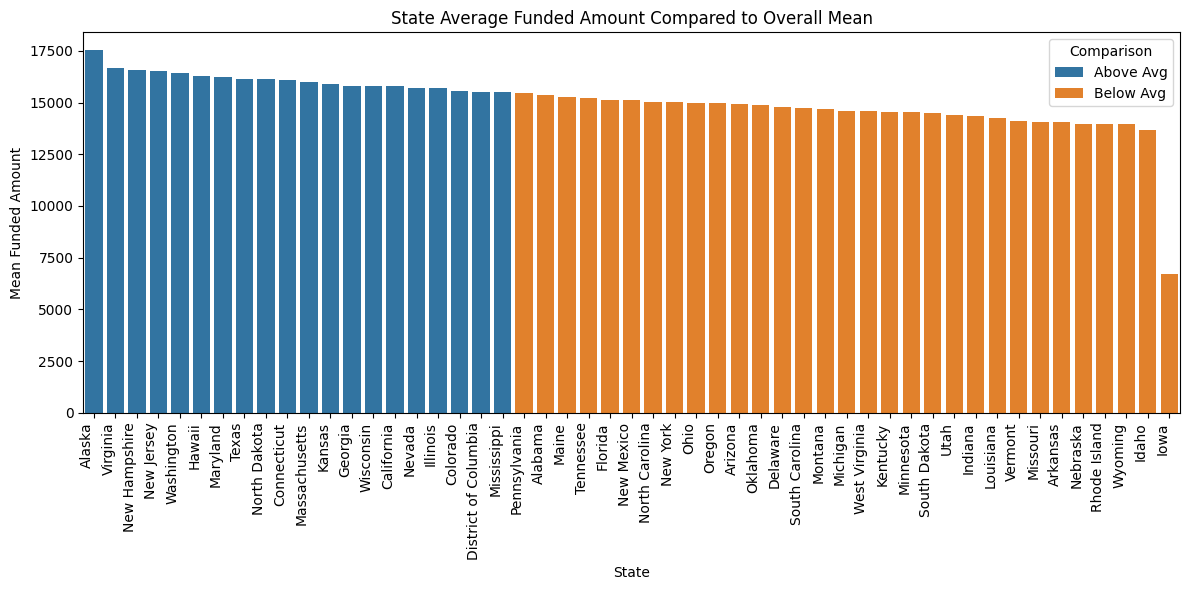

In [121]:
# Calculate the overall average funded amount across all states.
overall_mean_funded = df['funded_amount'].mean()
print(f"Overall average funded amount: ${overall_mean_funded:,.2f}")

# Calculate and categorize state average funded amounts
state_funded_amounts = df.groupby('state_name')['funded_amount'].mean().sort_values(ascending=False)
state_comparison_funded = state_funded_amounts.apply(
    lambda x: "Above Avg" if x > overall_mean_funded else ("Avg" if x == overall_mean_funded else "Below Avg")
)

# Create summary DataFrame
summary_df_funded = pd.DataFrame({
    'State': state_comparison_funded.index,
    'Avg Funded Amount': state_funded_amounts,
    'Comparison': state_comparison_funded.values
})

# Count states in each category and calculate percentages
category_counts_funded = summary_df_funded['Comparison'].value_counts()
category_percentages_funded = summary_df_funded['Comparison'].value_counts(normalize=True) * 100

print("\nState Funded Amount Category Counts:")
for category, count in category_counts_funded.items():
    percentage = category_percentages_funded[category]
    print(f"{category}: {count} ({percentage:.2f}%)")

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Avg Funded Amount', hue='Comparison', data=summary_df_funded)
plt.title('State Average Funded Amount Compared to Overall Mean')
plt.xlabel('State')
plt.ylabel('Mean Funded Amount')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

While the average funded amount is $15,466 , a notable regional variation exists, with 39% of states receiving above-average loans, suggesting diverse borrowing patterns across the US.



---



## **What is the distribution of titles in the dataset with respect to the number of customers, their average annual income, and the average funded amount?**

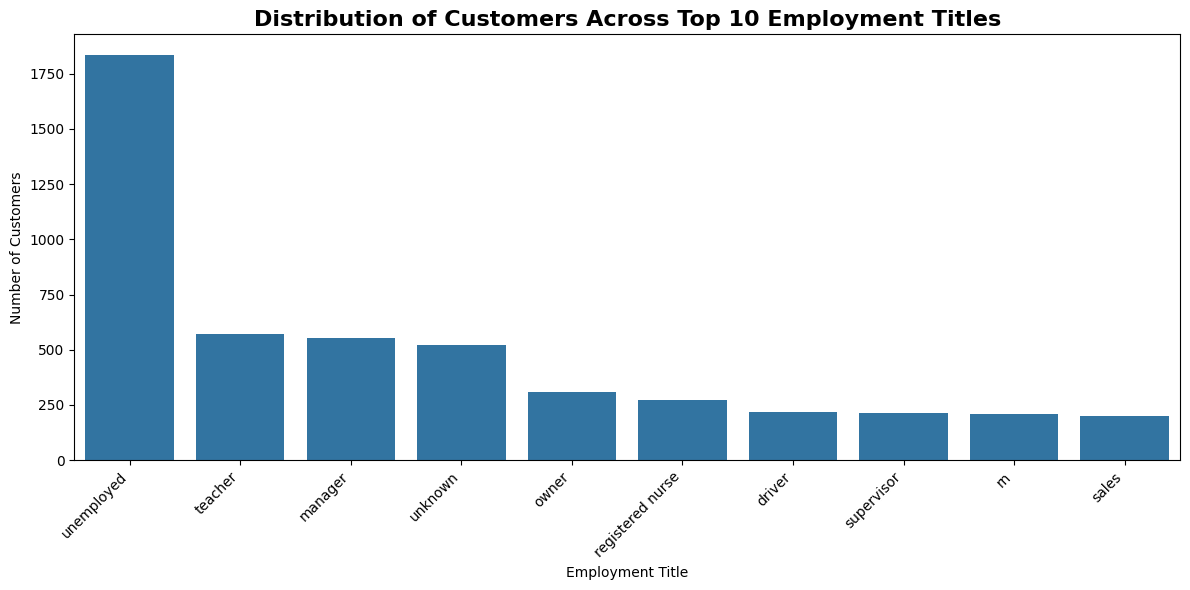

                  Count  Percentage
emp_title                          
unemployed         1836    6.792453
teacher             572    2.116167
manager             551    2.038476
unknown             521    1.927488
owner               311    1.150573
registered nurse    273    1.009989
driver              217    0.802812
supervisor          213    0.788013
rn                  211    0.780614
sales               200    0.739919


In [122]:
# Calculate employment title counts
emp_title_counts = df['emp_title'].value_counts().nlargest(10).sort_values(ascending=False)

# Calculate percentages
emp_title_percentages = (emp_title_counts / len(df)) * 100

# Create a DataFrame
emp_title_distribution = pd.DataFrame({
    'Count': emp_title_counts,
    'Percentage': emp_title_percentages
})

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x=emp_title_distribution.index, y=emp_title_distribution['Count'])
plt.title('Distribution of Customers Across Top 10 Employment Titles', fontsize=16, fontweight='bold')
plt.xlabel('Employment Title')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Print the DataFrame
print(emp_title_distribution)

A significant portion (6.7%) of borrowers were identified as 'unemployed' based on imputations for missing employment information.

Overall average annual income: $80,743.46

Employee Title Income Category Counts:
Below Avg: 7511 (63.74%)
Above Avg: 4273 (36.26%)


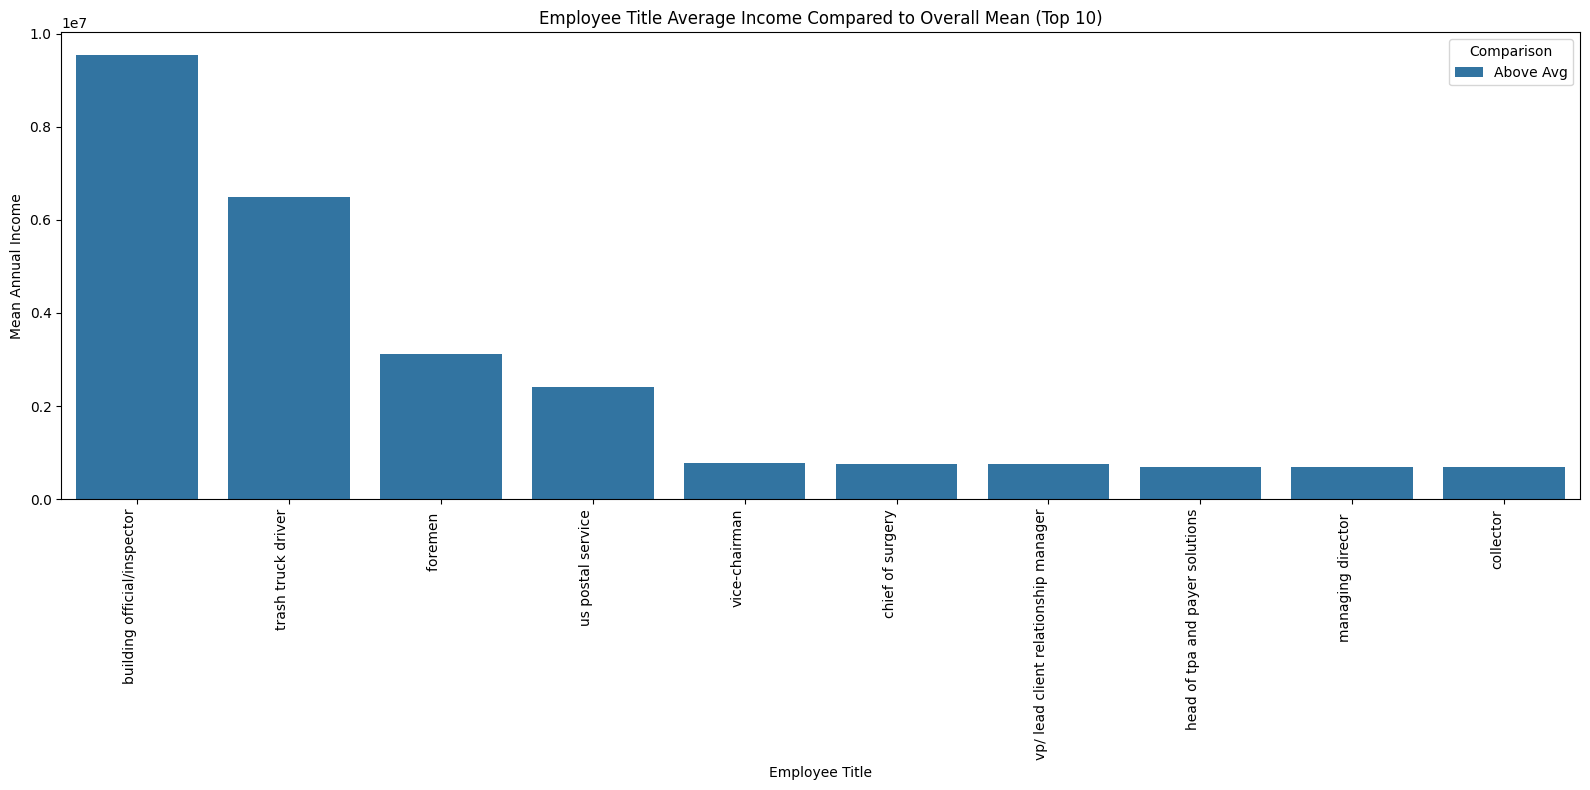

,Employee Title,Avg Income,Comparison
emp_title,,,
building official/inspector,building official/inspector,9550000.0,Above Avg
trash truck driver,trash truck driver,6500031.0,Above Avg
foremen,foremen,3106527.0,Above Avg
us postal service,us postal service,2409926.0,Above Avg
vice-chairman,vice-chairman,768000.0,Above Avg
chief of surgery,chief of surgery,750000.0,Above Avg
vp/ lead client relationship manager,vp/ lead client relationship manager,749000.0,Above Avg
head of tpa and payer solutions,head of tpa and payer solutions,700000.0,Above Avg
managing director,managing director,685000.0,Above Avg


In [123]:
# Calculate the overall average annual income across all employee titles.
overall_mean = df['annual_inc'].mean()
print(f"Overall average annual income: ${overall_mean:,.2f}")

# Calculate and categorize employee title average incomes
emp_title_incomes = df.groupby('emp_title')['annual_inc'].mean().sort_values(ascending=False)
emp_title_comparison = emp_title_incomes.apply(
    lambda x: "Above Avg" if x > overall_mean else ("Avg" if x == overall_mean else "Below Avg")
)

# Create summary DataFrame
summary_title_df = pd.DataFrame({
    'Employee Title': emp_title_comparison.index,
    'Avg Income': emp_title_incomes,
    'Comparison': emp_title_comparison.values
})

# Count employee titles in each category and calculate percentages
category_counts = summary_title_df['Comparison'].value_counts()
category_percentages = summary_title_df['Comparison'].value_counts(normalize=True) * 100

print("\nEmployee Title Income Category Counts:")
for category, count in category_counts.items():
    percentage = category_percentages[category]
    print(f"{category}: {count} ({percentage:.2f}%)")

# Create bar plot (for top N employee titles for better visualization)
N = 10  # Display top N employee titles
plt.figure(figsize=(16, 8))
sns.barplot(x='Employee Title', y='Avg Income', hue='Comparison',
            data=summary_title_df.head(N))  # Use head(N) to select top N
plt.title('Employee Title Average Income Compared to Overall Mean (Top 10)')
plt.xlabel('Employee Title')
plt.ylabel('Mean Annual Income')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()
summary_title_df.head(10)

Overall average funded amount: $15,466.89

Employee Title Funded Amount Category Counts:
Below Avg: 6777 (57.51%)
Above Avg: 5007 (42.49%)


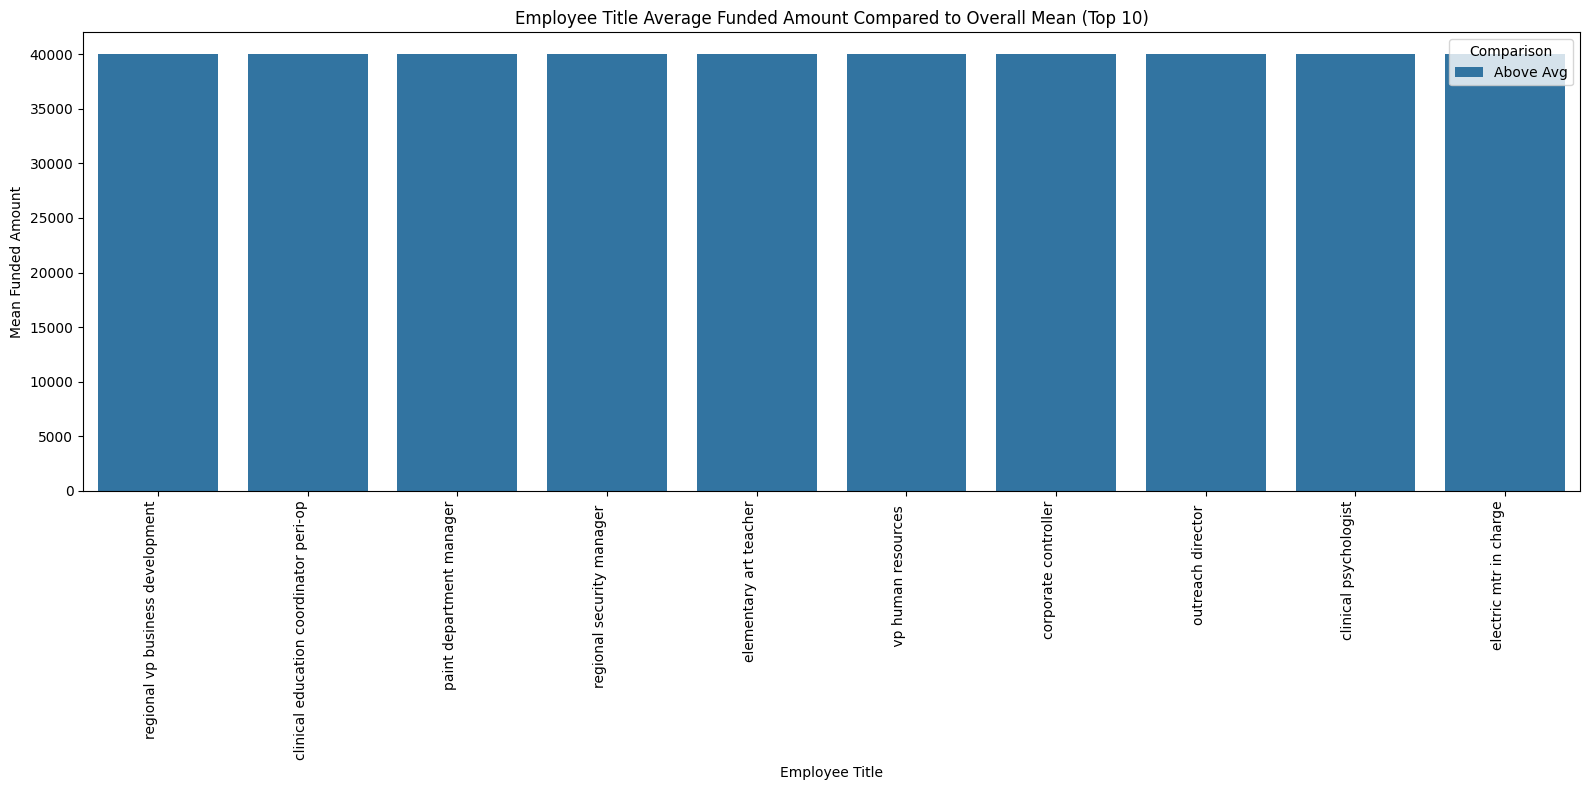

,Employee Title,Avg Funded Amount,Comparison
emp_title,,,
regional vp business development,regional vp business development,40000.0,Above Avg
clinical education coordinator peri-op,clinical education coordinator peri-op,40000.0,Above Avg
paint department manager,paint department manager,40000.0,Above Avg
regional security manager,regional security manager,40000.0,Above Avg
elementary art teacher,elementary art teacher,40000.0,Above Avg
...,...,...,...
public safety supervisor,public safety supervisor,1000.0,Below Avg
assembly tech,assembly tech,1000.0,Below Avg
childcare,childcare,1000.0,Below Avg


In [124]:
# Calculate the overall average funded amount across all employee titles.
overall_mean_funded = df['funded_amount'].mean()
print(f"Overall average funded amount: ${overall_mean_funded:,.2f}")

# Calculate and categorize employee title average funded amounts
emp_title_funded_amounts = df.groupby('emp_title')['funded_amount'].mean().sort_values(ascending=False)
emp_title_comparison_funded = emp_title_funded_amounts.apply(
    lambda x: "Above Avg" if x > overall_mean_funded else ("Avg" if x == overall_mean_funded else "Below Avg")
)

# Create summary DataFrame
summary_title_funded_df = pd.DataFrame({
    'Employee Title': emp_title_comparison_funded.index,
    'Avg Funded Amount': emp_title_funded_amounts,
    'Comparison': emp_title_comparison_funded.values
})

# Count employee titles in each category and calculate percentages
category_counts_funded = summary_title_funded_df['Comparison'].value_counts()
category_percentages_funded = summary_title_funded_df['Comparison'].value_counts(normalize=True) * 100

print("\nEmployee Title Funded Amount Category Counts:")
for category, count in category_counts_funded.items():
    percentage = category_percentages_funded[category]
    print(f"{category}: {count} ({percentage:.2f}%)")

# Create bar plot (for top N employee titles for better visualization)
N = 10  # Display top N employee titles
plt.figure(figsize=(16, 8))
sns.barplot(x='Employee Title', y='Avg Funded Amount', hue='Comparison',
            data=summary_title_funded_df.head(N))  # Use head(N) to select top N
plt.title('Employee Title Average Funded Amount Compared to Overall Mean (Top 10)')
plt.xlabel('Employee Title')
plt.ylabel('Mean Funded Amount')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Display the summary DataFrame
summary_title_funded_df

The analysis reveals an interesting pattern: the top employee titles, based on average funded amount, all share the same average of $40,000. This suggests that, despite holding different roles and potentially having varying income levels, these individuals tend to receive similar loan amounts.



The average interest rate is: 0.13


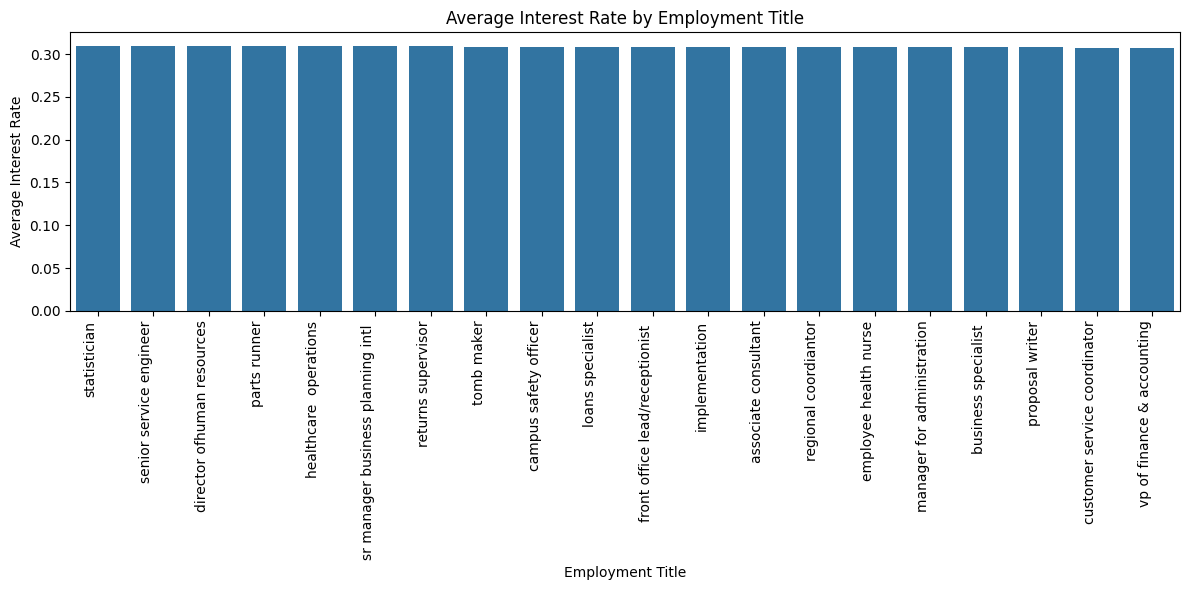

emp_title
statistician                          0.3099
senior service engineer               0.3099
director ofhuman resources            0.3099
parts runner                          0.3099
healthcare  operations                0.3099
sr manager business planning intl     0.3094
returns supervisor                    0.3089
tomb maker                            0.3084
campus safety officer                 0.3084
loans specialist                      0.3084
front office lead/receptionist        0.3084
implementation                        0.3079
associate consultant                  0.3079
regional coordiantor                  0.3079
employee health nurse                 0.3079
manager for administration            0.3079
business specialist                   0.3079
proposal writer                       0.3079
customer service coordinator          0.3075
vp of finance & accounting            0.3075
Name: int_rate, dtype: float64

In [125]:
# the average int_rate
average_int_rate = df['int_rate'].mean()
print(f"The average interest rate is: {average_int_rate:.2f}")
# Group by employment title and calculate average interest rate
average_int_rate_by_title = df.groupby('emp_title')['int_rate'].mean()

# Sort by average interest rate for better visualization
average_int_rate_by_title = average_int_rate_by_title.sort_values(ascending=False)

# Select top N employment titles for visualization (optional)
top_n = 20  # You can adjust this number
average_int_rate_by_title = average_int_rate_by_title.head(top_n)



plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='emp_title', y='int_rate', data=average_int_rate_by_title.reset_index())
plt.title('Average Interest Rate by Employment Title')
plt.xlabel('Employment Title')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
average_int_rate_by_title

These titles typically have interest rates that are about twice as high as the average (0.31) when compared to the average (0.13).

## **Whar is the average interest rate in the data set grouped by the grade and the duration of the loan?**

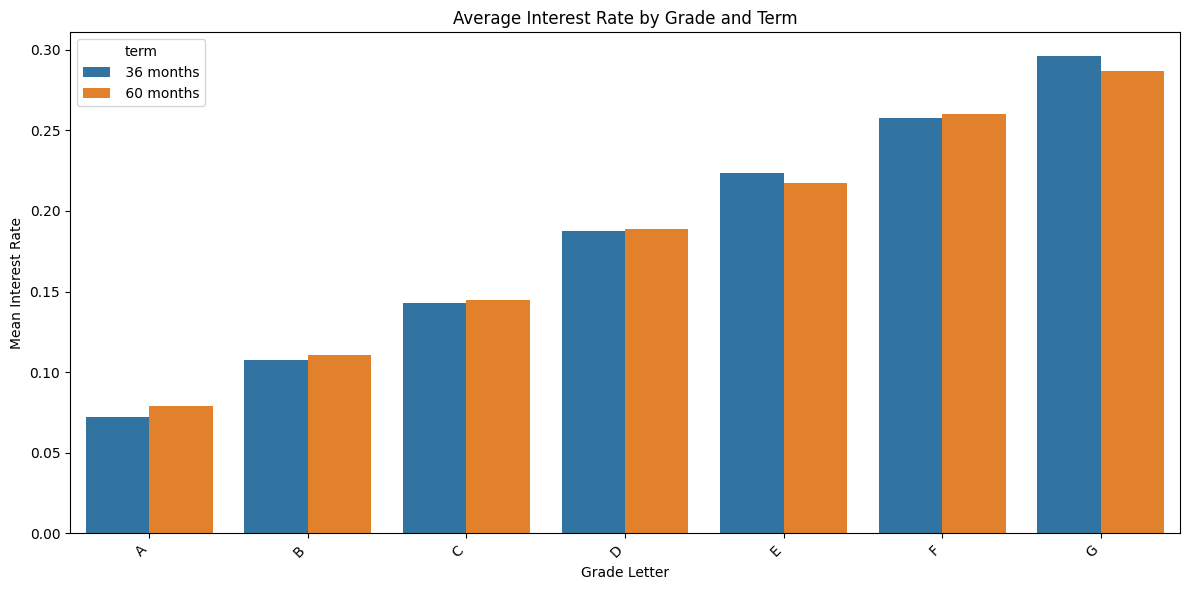

,grade_letter,term,int_rate
0,A,36 months,0.071841
1,A,60 months,0.079139
2,B,36 months,0.107780
3,B,60 months,0.110843
4,C,36 months,0.143163
5,C,60 months,0.144894
6,D,36 months,0.187699
7,D,60 months,0.188704
8,E,36 months,0.223294
9,E,60 months,0.217306


In [126]:
grouped_data = df.groupby(['grade_letter', 'term'])['int_rate'].mean()

# Reset index to make 'grade_letter' and 'term' as columns
grouped_data = grouped_data.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='grade_letter', y='int_rate', hue='term', data=grouped_data)
plt.title('Average Interest Rate by Grade and Term')
plt.xlabel('Grade Letter')
plt.ylabel('Mean Interest Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
grouped_data


There's a direct relationship between interest rates and risk: higher grade letter leads to higher rates. Grades "G" and "E" present an unusual case where the average interest rate for a 36-month term is actually higher than for a 60-month term.

# detecting outliers

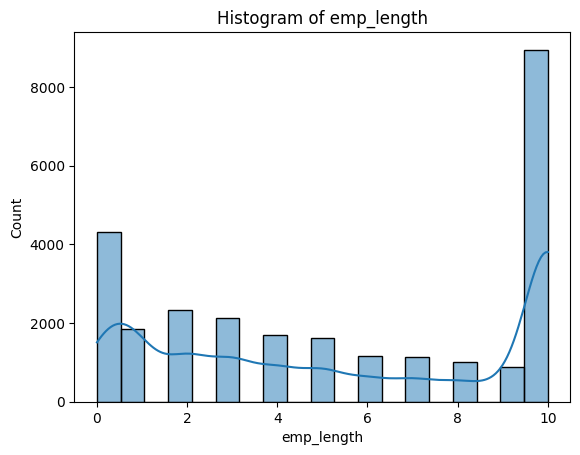

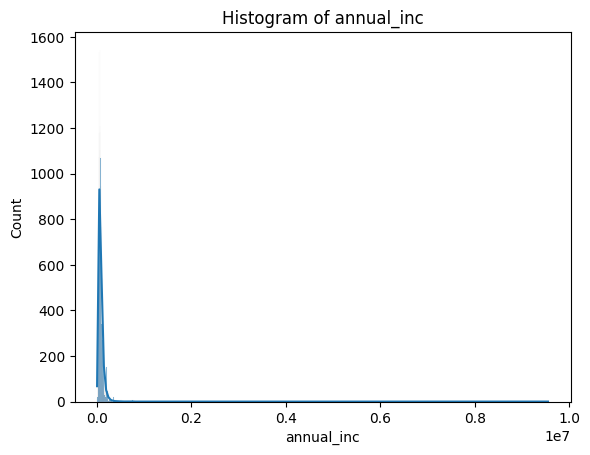

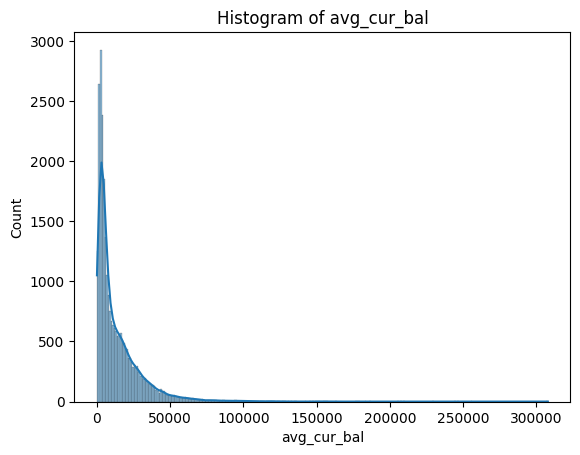

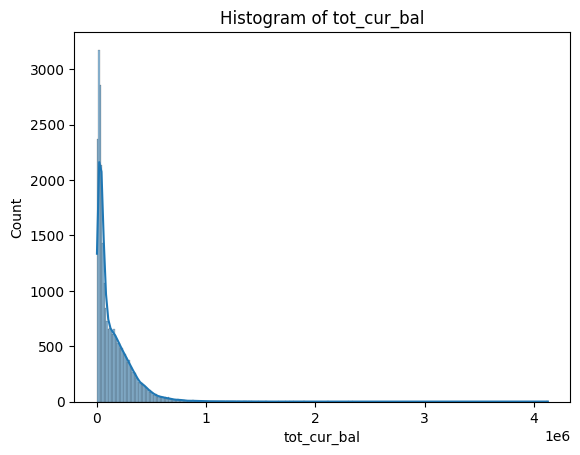

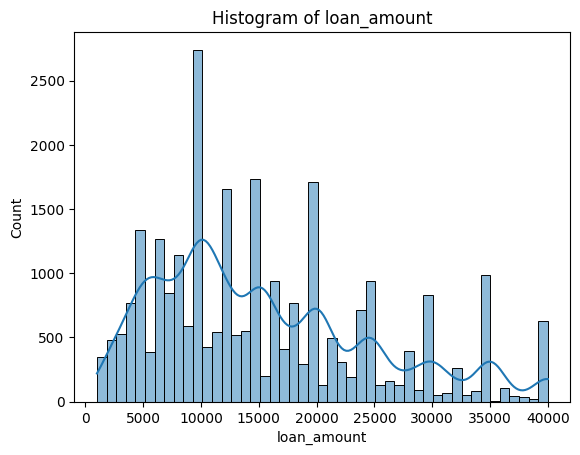

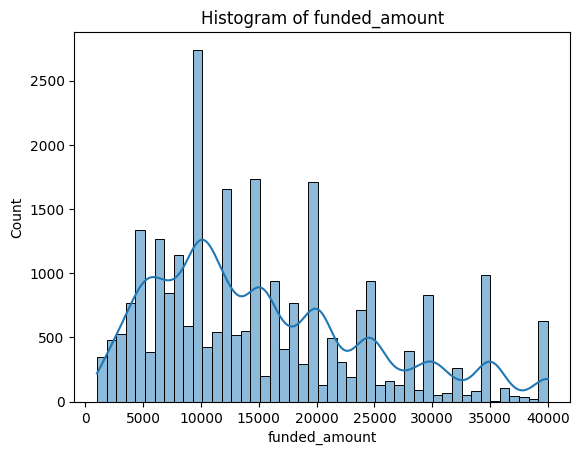

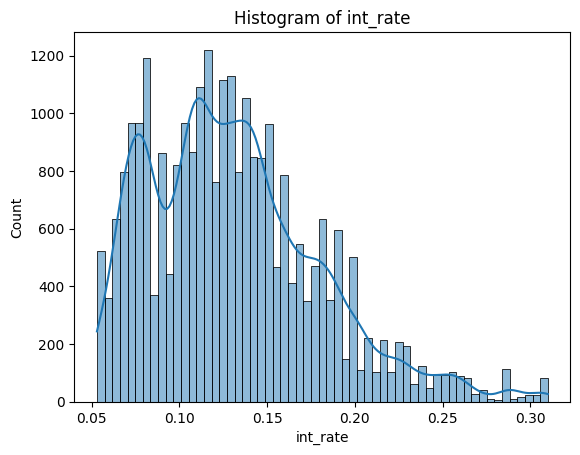

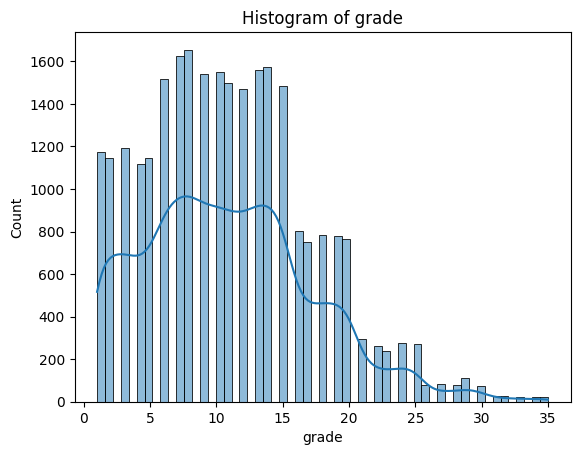

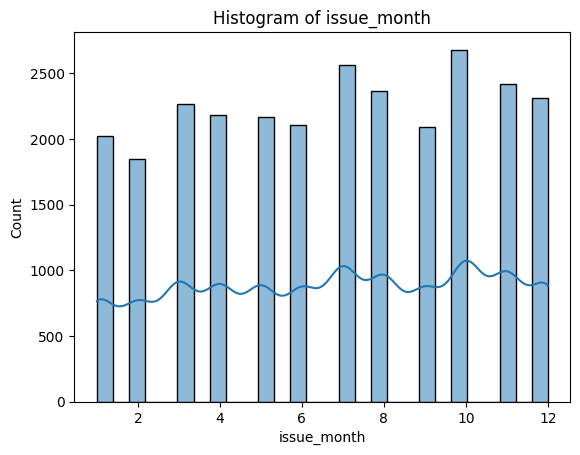

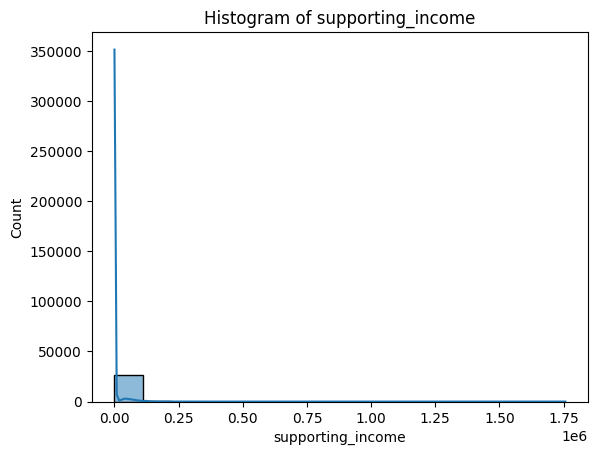

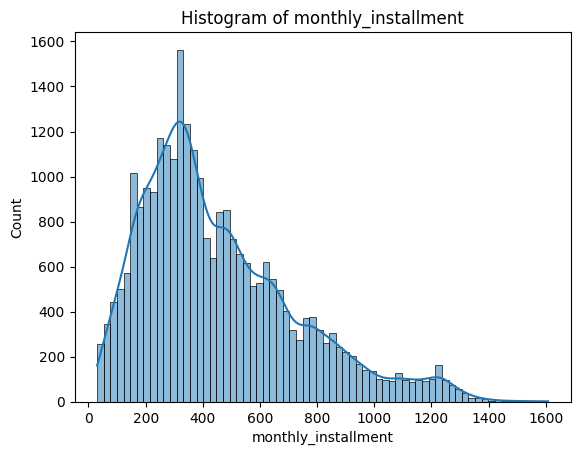

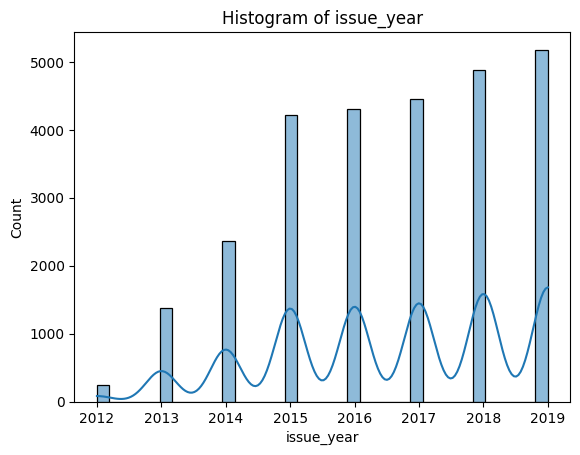

In [127]:
# Select numerical data for the histogram
numerical_data = df.select_dtypes(include=np.number)

# Iterate through columns and create histograms with KDE for each
for col in numerical_data.columns:
  sns.histplot(data=numerical_data[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.show()

In [128]:
def identify_outliers(df):
    """
    Identifies outliers in numerical columns using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing all identified outliers.
        list: List of columns with outliers.
        dict: A dictionary containing column names as keys and their outlier statistics as values.
    """
    numerical_cols = ['emp_length', 'annual_inc', 'avg_cur_bal', 'tot_cur_bal',
                      'loan_amount', 'funded_amount', 'int_rate', 'grade',
                      'supporting_income', 'monthly_installment']

    all_outliers = []
    outlier_columns = []
    outlier_stats = {}

    for col in numerical_cols:
        if col in df.columns:
            data = df[col]

            # Calculate descriptive statistics
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            stats = {
                'Min': data.min(),
                'Max': data.max(),
                'Mean': data.mean(),
                'Median': data.median(),
                'SD': data.std(),
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
            }

            # Identify outliers
            outliers = df[(data < lower_bound) | (data > upper_bound)]
            if not outliers.empty:
                outlier_columns.append(col)
                all_outliers.extend(outliers[[col]].assign(column_name=col).to_dict('records'))
                outlier_stats[col] = stats

    # Create a DataFrame for all outliers
    all_outliers_df = pd.DataFrame(all_outliers)

    # Save to CSV and print results
    if not all_outliers_df.empty:
        all_outliers_df.to_csv('lookup_tables/outliers_lookup.csv', index=False)
        print("Outliers saved to outliers_lookup.csv")
        print(f"Columns with outliers: {outlier_columns}")
    else:
        print("No outliers found.")

    return all_outliers_df, outlier_stats, outlier_columns

outliers_df, outlier_columns, outlier_stats = identify_outliers(df)# Capture outlier_stats and outlier_columns


Outliers saved to outliers_lookup.csv
Columns with outliers: ['annual_inc', 'avg_cur_bal', 'tot_cur_bal', 'loan_amount', 'funded_amount', 'int_rate', 'grade', 'supporting_income', 'monthly_installment']


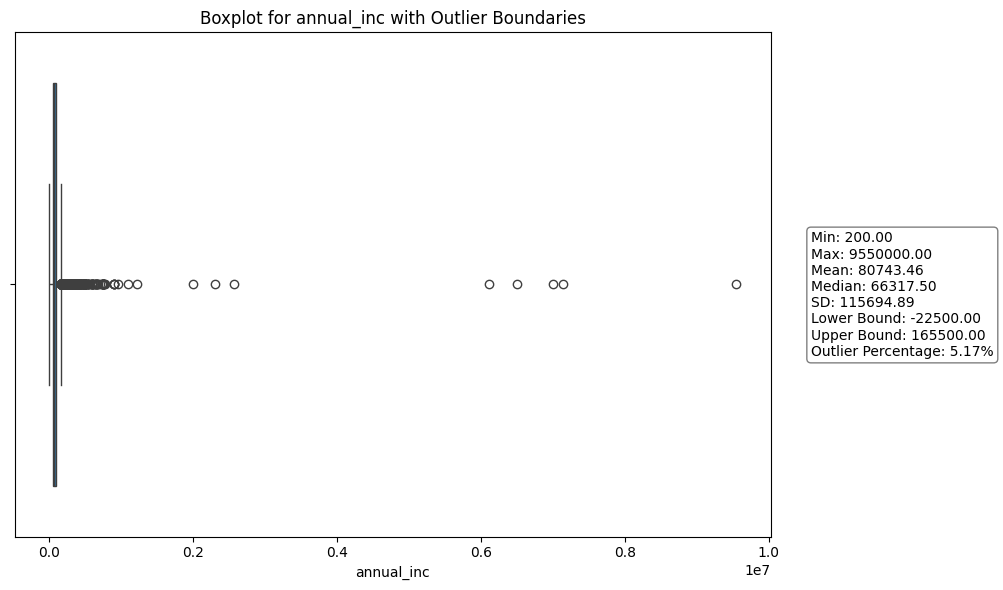

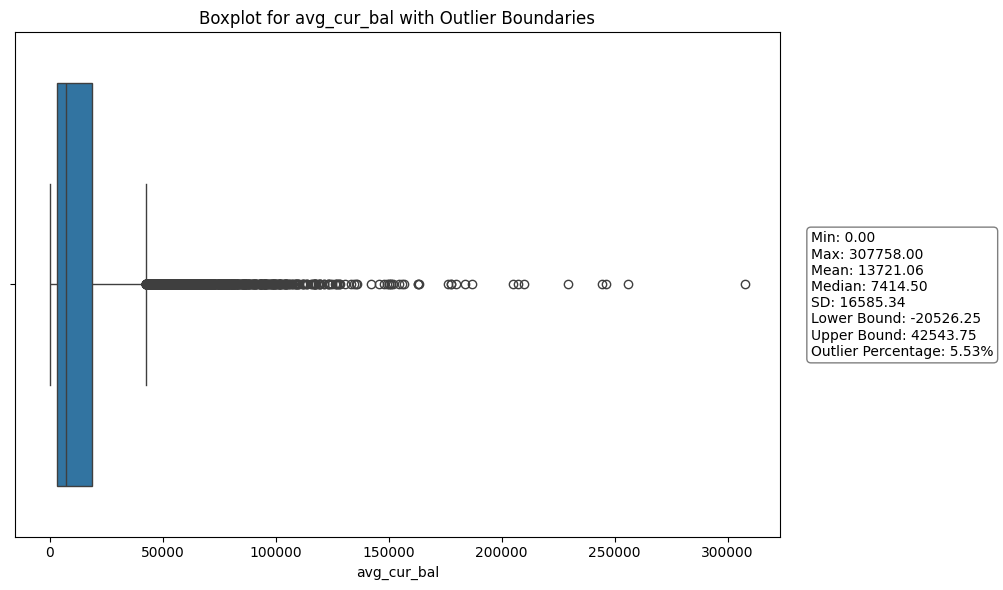

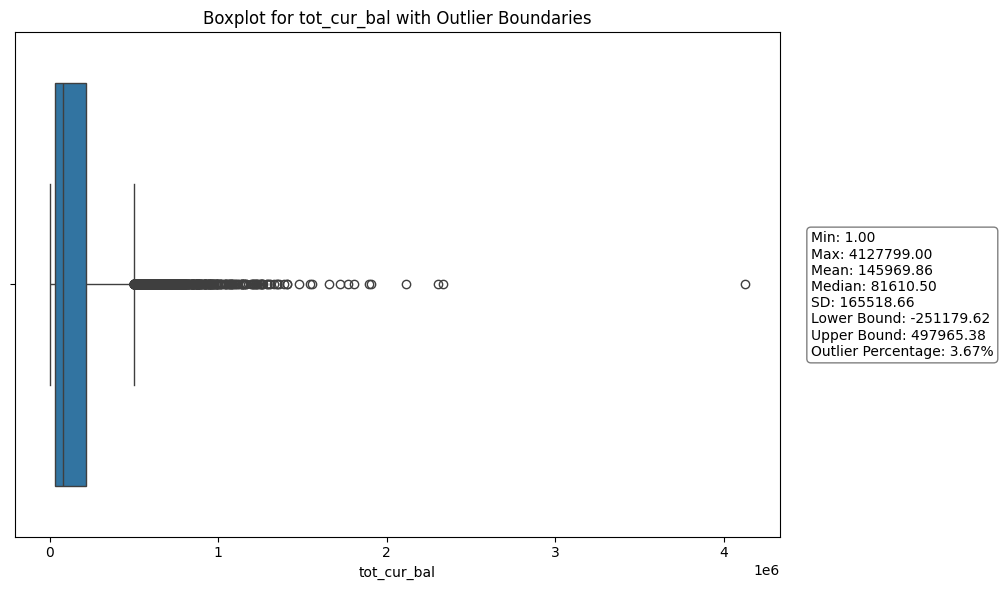

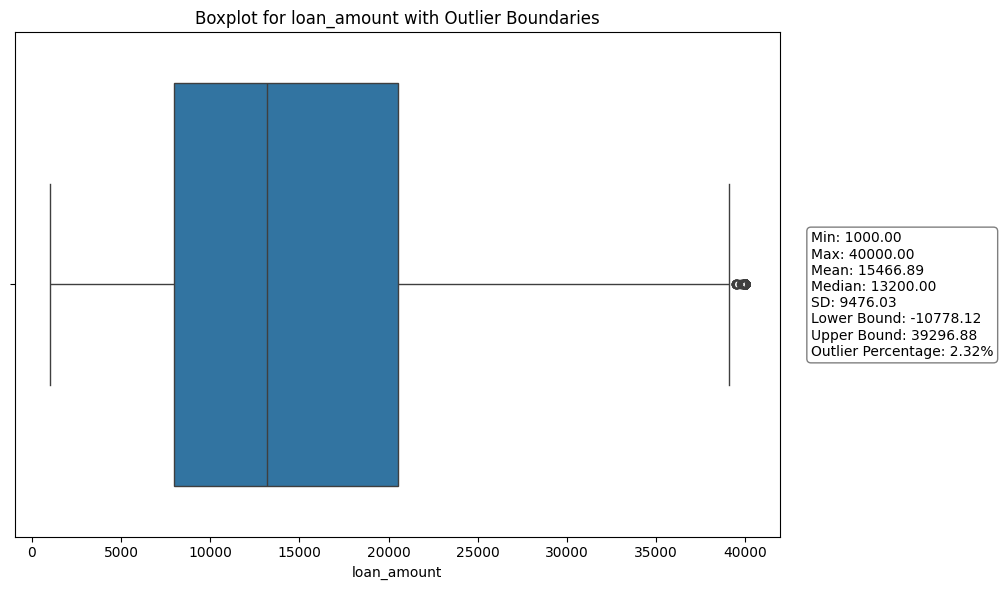

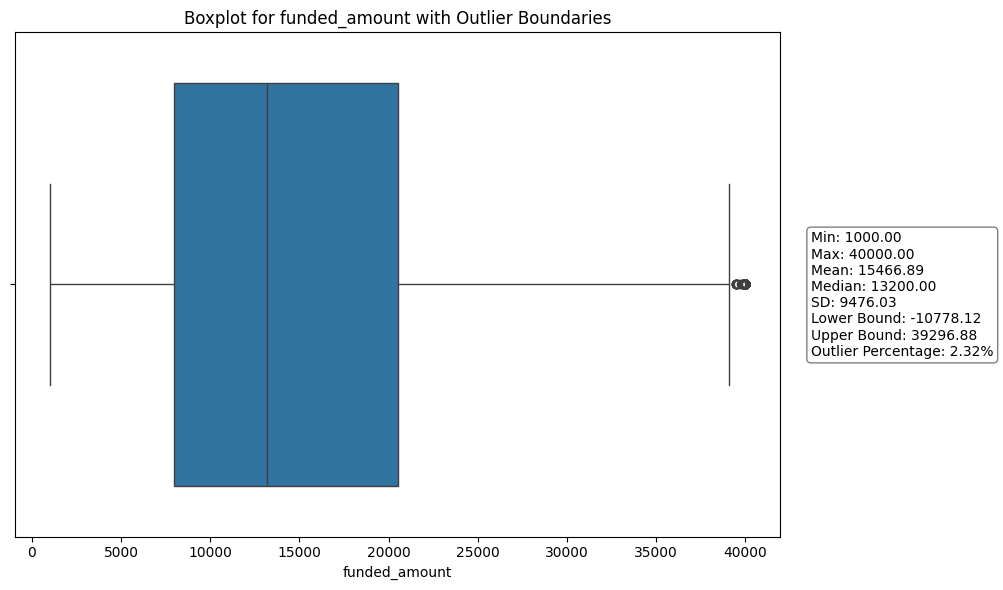

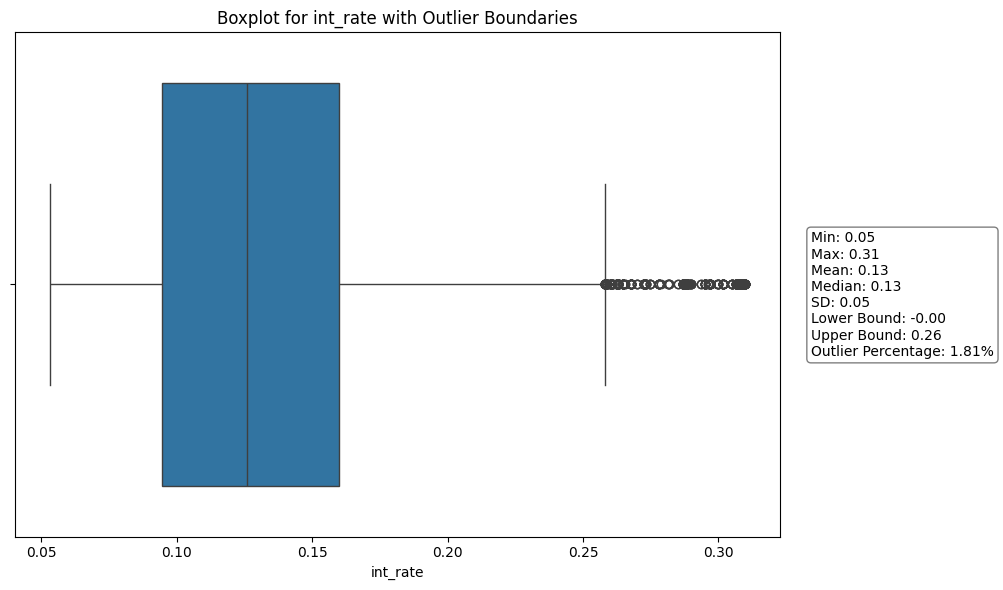

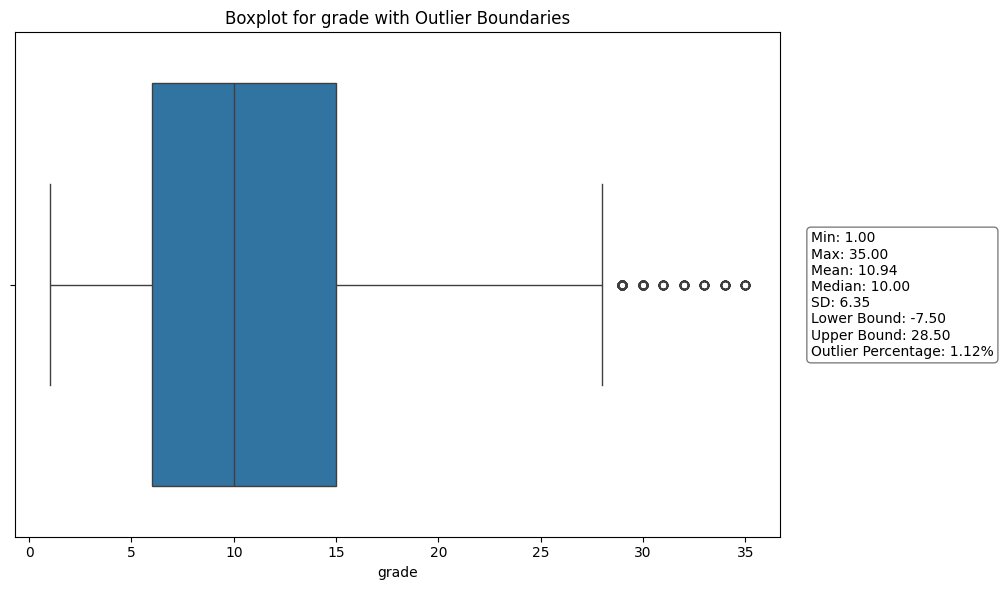

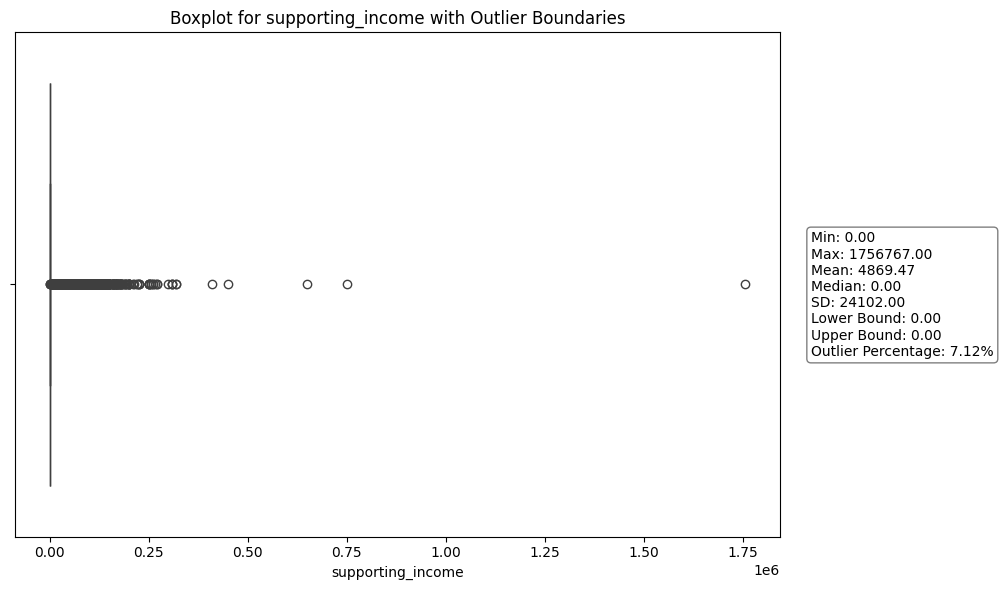

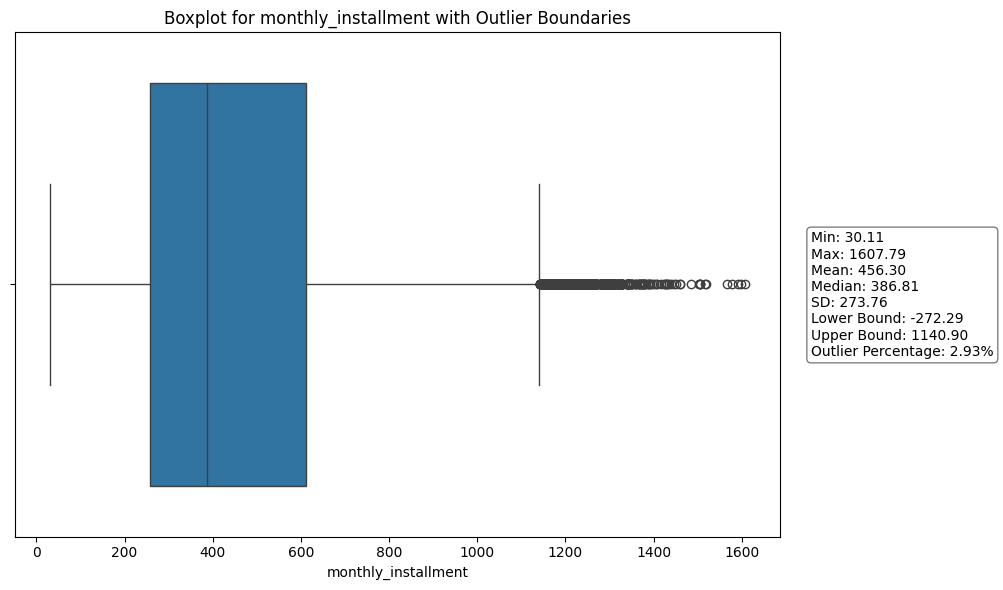

In [129]:
def visualize_outliers(df, outlier_stats, outlier_columns):
    """
    Visualizes the boxplots of columns with outliers.

    Args:
        df (pd.DataFrame): The input DataFrame.
        outlier_stats (dict): Dictionary containing column names as keys and their outlier statistics as values.
        outlier_columns (list): List of columns with outliers.
    """
    for col in outlier_columns:
        data = df[col].dropna()

        # Calculate descriptive statistics
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        stats = {
            'Min': data.min(),
            'Max': data.max(),
            'Mean': data.mean(),
            'Median': data.median(),
            'SD': data.std(),
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
        }

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        total_count = len(data)
        outlier_percentage = (outlier_count / total_count) * 100 if total_count > 0 else 0

        # Visualize with box plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data)
        plt.title(f"Boxplot for {col} with Outlier Boundaries")

        # Add legend with descriptive statistics and outlier percentage
        legend_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
        legend_text += f"\nOutlier Percentage: {outlier_percentage:.2f}%"

        plt.figtext(1.02, 0.5, legend_text, fontsize=10, verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))
        plt.tight_layout()
        plt.show()

# Call the function
visualize_outliers(df, outlier_columns, outlier_stats)

In [130]:
print(outlier_columns)

{'annual_inc': {'Min': np.float64(200.0), 'Max': np.float64(9550000.0), 'Mean': np.float64(80743.45605031446), 'Median': np.float64(66317.5), 'SD': np.float64(115694.88862751592), 'Lower Bound': np.float64(-22500.0), 'Upper Bound': np.float64(165500.0)}, 'avg_cur_bal': {'Min': np.float64(0.0), 'Max': np.float64(307758.0), 'Mean': np.float64(13721.055234924159), 'Median': np.float64(7414.5), 'SD': np.float64(16585.34150882168), 'Lower Bound': np.float64(-20526.25), 'Upper Bound': np.float64(42543.75)}, 'tot_cur_bal': {'Min': np.float64(1.0), 'Max': np.float64(4127799.0), 'Mean': np.float64(145969.8615982242), 'Median': np.float64(81610.5), 'SD': np.float64(165518.66372915232), 'Lower Bound': np.float64(-251179.625), 'Upper Bound': np.float64(497965.375)}, 'loan_amount': {'Min': np.float64(1000.0), 'Max': np.float64(40000.0), 'Mean': np.float64(15466.890492045875), 'Median': np.float64(13200.0), 'SD': np.float64(9476.026925476066), 'Lower Bound': np.float64(-10778.125), 'Upper Bound': np

# handling outliers


Log Transformation's Purpose: Log transformations primarily aim to reduce the impact of extreme values (outliers) by compressing the scale of the data. They're often effective in making data more normally distributed and stabilizing variance.

In [131]:

def handle_outlier_columns_with_log(df, outlier_columns):
    """
    Applies log transformation (log([col] + 1)) to columns with outliers and
    creates a CSV file with column name, original value, and transformed value.

    Args:
        df (pd.DataFrame): The input DataFrame.
        outlier_cols (list): List of columns with outliers to transform.

    Returns:
        pd.DataFrame: The DataFrame with log-transformed outlier columns.
    """
    df_handling_outliers = df.copy()
    transformed_data = []  # List to store transformed data

    for col in outlier_columns:
        if col in df_handling_outliers.columns:
            # Get original values for the column
            original_values = df_handling_outliers[col]

            # Apply log transformation
            df_handling_outliers[col] = np.log1p(df_handling_outliers[col])

            # Store transformed data
            for original, transformed in zip(original_values, df_handling_outliers[col]):
                transformed_data.append({'column_name': col, 'original_value': original, 'transformed_value': transformed})

            print(f"Log transformation applied to column: {col}")
        else:
            print(f"Column {col} not found in the DataFrame.")

    # Create a DataFrame from transformed data
    transformed_df = pd.DataFrame(transformed_data)

    # Save transformed data to CSV
    transformed_df.to_csv('lookup_tables/transformed_outliers_lookup.csv', index=False)
    print("Transformed outlier data saved to transformed_outliers_lookup.csv")

    return df_handling_outliers

# Assuming you have 'df' and 'outlier_columns' defined
df_loged = handle_outlier_columns_with_log(df, outlier_columns)
print("\nTransformed DataFrame:")
df_loged.head()

Log transformation applied to column: annual_inc
Log transformation applied to column: avg_cur_bal
Log transformation applied to column: tot_cur_bal
Log transformation applied to column: loan_amount
Log transformation applied to column: funded_amount
Log transformation applied to column: int_rate
Log transformation applied to column: grade
Log transformation applied to column: supporting_income
Log transformation applied to column: monthly_installment
Transformed outlier data saved to transformed_outliers_lookup.csv

Transformed DataFrame:


,,emp_title,emp_length,home_ownership,annual_inc,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,...,type,purpose,description,issue_month,grade_letter,supporting_income,state_name,monthly_installment,salary_can_cover,issue_year
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=,7364,bellagio hotel,10.0,mortgage,10.714440,not verified,891xx,nv,9.619532,11.922070,fully paid,...,individual,debt_consolidation,paymeoff,8,B,0.0,Nevada,4.432947,True,2012
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci,46875,the one group & the bryant park hotel,0.5,rent,10.602840,verified,100xx,ny,6.929517,8.315322,charged off,...,individual,other,moving fund & debt consolidation,8,C,0.0,New York,5.017200,True,2012
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=,24085,hitachi metals automotive components,10.0,mortgage,10.985310,not verified,624xx,il,8.508354,10.705377,fully paid,...,individual,debt_consolidation,debt consolidation,8,B,0.0,Illinois,5.107535,True,2012
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn,141865,quest diagnostics,8.0,rent,10.596660,not verified,064xx,ct,7.429521,9.914131,charged off,...,individual,debt_consolidation,debt consolidation loan,8,B,0.0,Connecticut,6.174019,True,2012
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=,98436,usps,6.0,mortgage,10.885585,source verified,357xx,al,9.269835,11.908785,fully paid,...,individual,debt_consolidation,debt clean up,8,D,0.0,Alabama,5.899861,True,2012


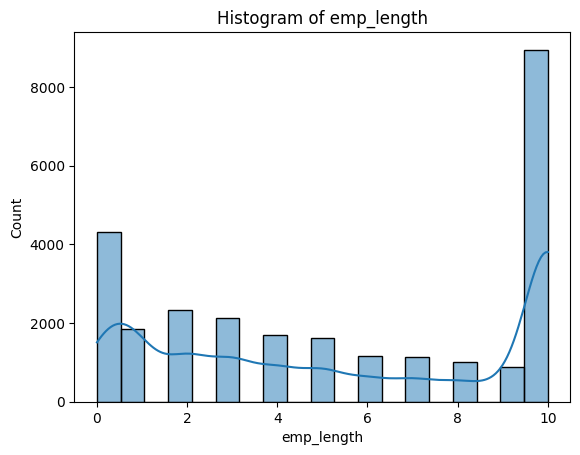

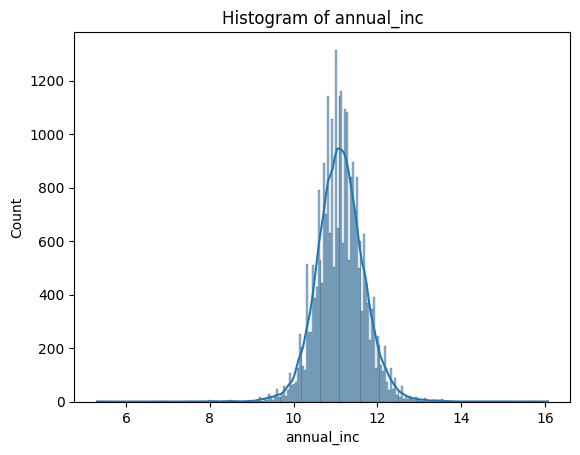

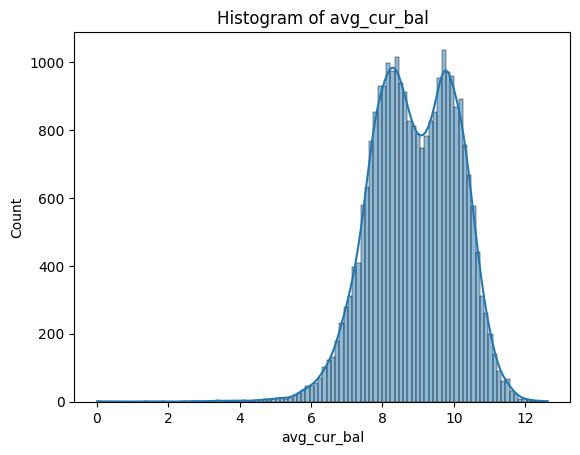

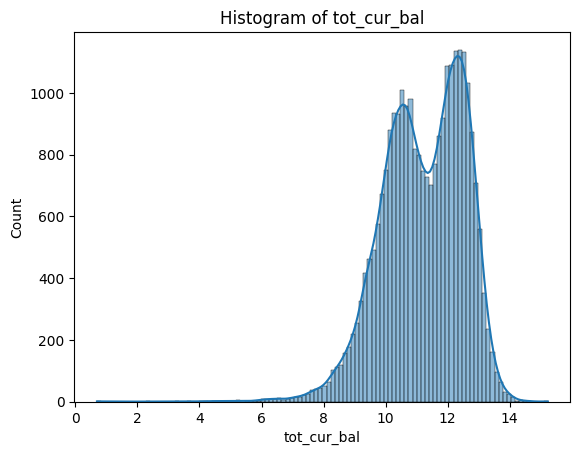

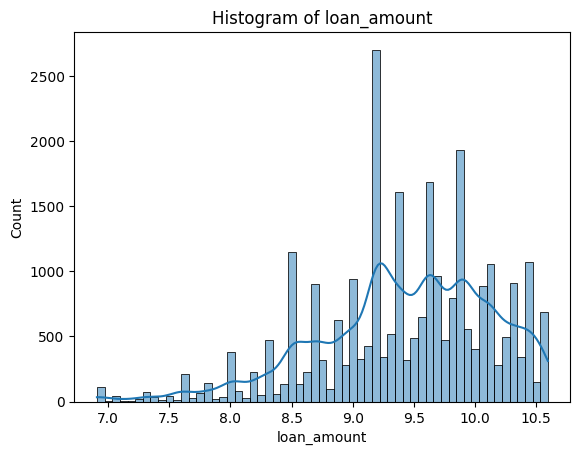

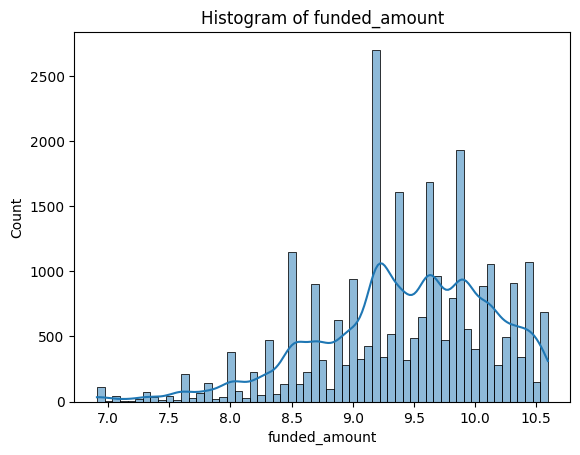

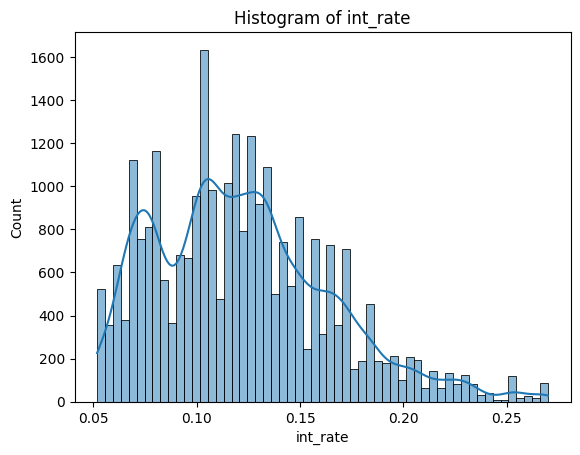

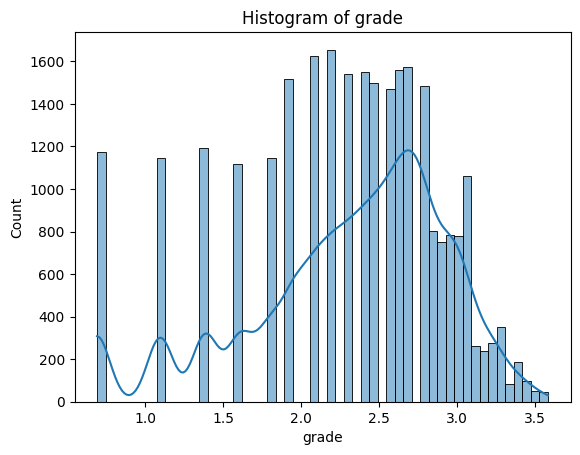

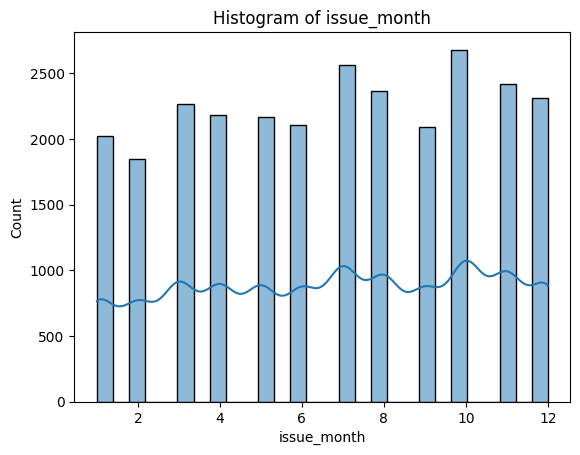

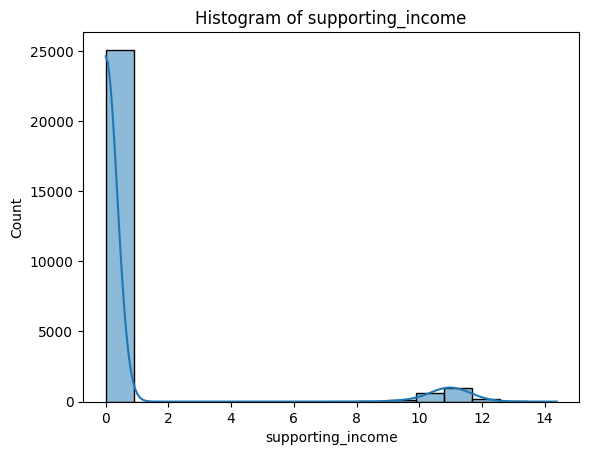

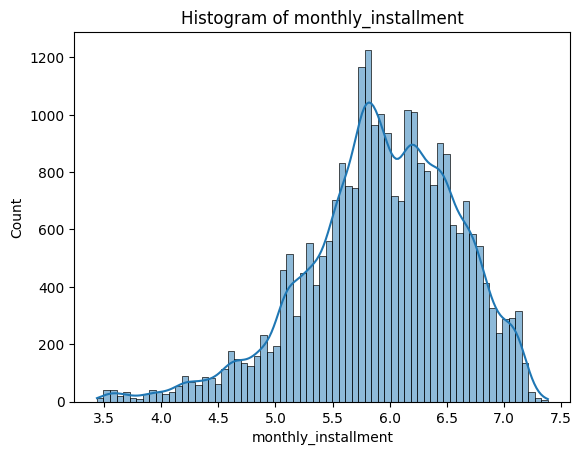

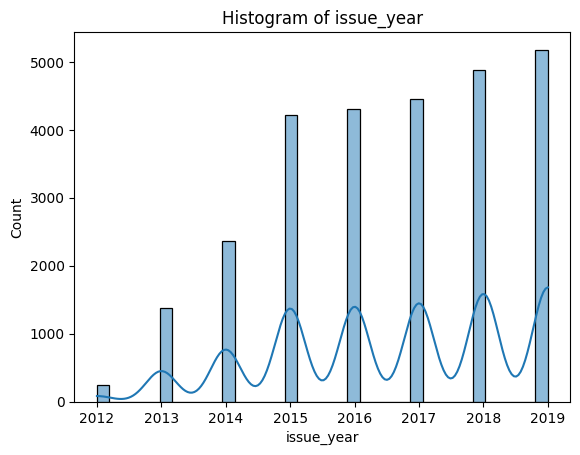

In [132]:
# Select numerical data for the histogram
numerical_data = df_loged.select_dtypes(include=np.number)

# Iterate through columns and create histograms with KDE for each
for col in numerical_data.columns:
  sns.histplot(data=numerical_data[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.show()

# Encoding

As required we need apply encoding exclusively to the categorical features listed below:(Home Owenership, Load Status, Verification Status, State and/or Addr State, Purpose, Term, Letter Grade, Type)

In [133]:
# Loop through a list of specified categorical columns,
# If the column exists, calculate the number of unique values in that column
for col in ['home_ownership', 'loan_status', 'verification_status', 'state', 'purpose', 'term', 'grade_letter', 'type']:
    if col in df_loged.columns:
        unique_count = df_loged[col].nunique()
        print(f"Number of unique values in '{col}': {unique_count}")
    else:
        print(f"Column '{col}' not found in df_transformed.")

Number of unique values in 'home_ownership': 4
Number of unique values in 'loan_status': 6
Number of unique values in 'verification_status': 3
Number of unique values in 'state': 51
Number of unique values in 'purpose': 13
Number of unique values in 'term': 2
Number of unique values in 'grade_letter': 7
Number of unique values in 'type': 4


In [134]:
# This function encodes categorical features using One-Hot, Label, and Frequency encoding techniques.

def encode_categorical_features(df_loged):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder
    encoding_lookup = []  # List to store encoding information

    # One-hot encoding
    one_hot_columns = ['home_ownership', 'verification_status', 'term', 'type', 'loan_status']
    for col in one_hot_columns:
        original_values = df_loged[col].unique()
        df_loged = pd.get_dummies(df_loged, columns=[col], drop_first=False, dtype=int)

    # Label encoding for 'grade_letter', 'state', and 'addr_state'
    le = LabelEncoder()
    for col in ['grade_letter', 'state', 'addr_state']:
        df_loged[col] = le.fit_transform(df_loged[col])
        # Create lookup entries for label encoding
        for original_val, encoded_val in zip(le.classes_, le.transform(le.classes_)):
            encoding_lookup.append({'column_name': col, 'original_value': original_val, 'encoded_value': encoded_val})

    # Frequency encoding for 'purpose'
    purpose_freq = df_loged['purpose'].value_counts(normalize=True).to_dict()
    df_loged['purpose'] = df_loged['purpose'].map(purpose_freq)
    # Create lookup entries for frequency encoding
    for original_val, encoded_val in purpose_freq.items():
        encoding_lookup.append({'column_name': 'purpose', 'original_value': original_val, 'encoded_value': encoded_val})

    # Create DataFrame from encoding_lookup and save to CSV
    encoding_lookup_df = pd.DataFrame(encoding_lookup)
    encoding_lookup_df.to_csv('lookup_tables/encoding_lookup.csv', index=False)
    print("Encoding lookup table saved to encoding_lookup.csv")

    return df_loged, le
df_encoded, label_encoders = encode_categorical_features(df_loged)
df_encoded.head()

Encoding lookup table saved to encoding_lookup.csv


,,emp_title,emp_length,annual_inc,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_amount,state,funded_amount,...,type_direct_pay,type_individual,type_joint,type_joint app,loan_status_charged off,loan_status_current,loan_status_fully paid,loan_status_in grace period,loan_status_late (16-30 days),loan_status_late (31-120 days)
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=,7364,bellagio hotel,10.0,10.714440,891xx,33,9.619532,11.922070,7.824446,33,7.824446,...,0,1,0,0,0,0,1,0,0,0
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci,46875,the one group & the bryant park hotel,0.5,10.602840,100xx,34,6.929517,8.315322,8.699681,34,8.699681,...,0,1,0,0,1,0,0,0,0,0
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=,24085,hitachi metals automotive components,10.0,10.985310,624xx,14,8.508354,10.705377,8.476580,14,8.476580,...,0,1,0,0,0,0,1,0,0,0
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn,141865,quest diagnostics,8.0,10.596660,064xx,6,7.429521,9.914131,9.575053,6,9.575053,...,0,1,0,0,1,0,0,0,0,0
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=,98436,usps,6.0,10.885585,357xx,1,9.269835,11.908785,9.210440,1,9.210440,...,0,1,0,0,0,0,1,0,0,0


In [135]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=', np.int64(7364)) to ('yidcedkzalx4ztc6xhhlzvx4zmrkxhhmy2xstkvcblx4mtncegq1xhhiy1x4otu6circede5xhgwm1x4mtdspvx4yzlcedg1m1x4otbcegywxhhlzxsn', np.int64(168797))
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   emp_title                            27030 non-null  object        
 1   emp_length                           27030 non-null  float64       
 2   annual_inc                           27030 non-null  float64       
 3   zip_code                             27030 non-null  object        
 4   addr_state                           27030 non-null  int64         
 5   avg_cur_bal                          27030 non-null  float64       
 6   tot_cur_bal                       

# **Normalization**

In [136]:
def min_max_normalization(df):
    """
    Applies Min-Max normalization to the specified columns of a DataFrame
    and creates a lookup table with original and normalized values.

    Args:
        df: The pandas DataFrame to normalize.
        columns: A list of column names to normalize.

    Returns:
        pd.DataFrame: The DataFrame with normalized columns.
        pd.DataFrame: The lookup table.
    """

    columns = ['emp_length','annual_inc', 'avg_cur_bal', 'tot_cur_bal',
                            'loan_amount', 'funded_amount', 'grade',
                            'supporting_income', 'monthly_installment']

    lookup_data = []  # Initialize an empty list to store lookup data

    for column in columns:
        # Calculate min and max values for the column
        min_val = df[column].min()
        max_val = df[column].max()

        # Create a temporary column to store original values
        df[column + '_original'] = df[column].copy()

        # Apply Min-Max normalization formula
        df[column] = (df[column] - min_val) / (max_val - min_val)

        # Append data to lookup list
        for index, row in df.iterrows():
            lookup_data.append([column, row[column + '_original'], row[column]])

        # Drop the temporary column
        df.drop(columns=[column + '_original'], inplace=True)

    # Create lookup table DataFrame
    lookup_table = pd.DataFrame(lookup_data, columns=['Column Name', 'Original Value', 'Normalized Value'])
    lookup_table.to_csv('lookup_tables/normalization_lookup_table.csv', index=False)
    print("normalization_lookup_table saved normalization_lookup_table.csv")
    return df


df_normalized = min_max_normalization(df_encoded)
df_normalized.head()

normalization_lookup_table saved normalization_lookup_table.csv


,,emp_title,emp_length,annual_inc,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_amount,state,funded_amount,...,type_direct_pay,type_individual,type_joint,type_joint app,loan_status_charged off,loan_status_current,loan_status_fully paid,loan_status_in grace period,loan_status_late (16-30 days),loan_status_late (31-120 days)
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=,7364,bellagio hotel,1.00,0.502485,891xx,33,0.761215,0.772272,0.248296,33,0.248296,...,0,1,0,0,0,0,1,0,0,0
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci,46875,the one group & the bryant park hotel,0.05,0.492122,100xx,34,0.548348,0.524217,0.485622,34,0.485622,...,0,1,0,0,1,0,0,0,0,0
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=,24085,hitachi metals automotive components,1.00,0.527638,624xx,14,0.673285,0.688594,0.425126,14,0.425126,...,0,1,0,0,0,0,1,0,0,0
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn,141865,quest diagnostics,0.80,0.491548,064xx,6,0.587915,0.634176,0.722985,6,0.722985,...,0,1,0,0,1,0,0,0,0,0
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=,98436,usps,0.60,0.518378,357xx,1,0.733543,0.771359,0.624117,1,0.624117,...,0,1,0,0,0,0,1,0,0,0


In [137]:
# save the data frame into csv file
def save_dataframe_to_csv(df):
    """
    Saves the given DataFrame to a CSV file.

    Args:
        df (pd.DataFrame): The DataFrame to be saved.

    Returns:
        pd.DataFrame: The original DataFrame (unchanged).
    """
    # save it in the final_df_lookup
    df_normalized.to_csv('lookup_tables/final_df_lookup.csv', index=False)
    print("DataFrame saved to final_df_lookup.csv")
    return df_normalized
final_df = save_dataframe_to_csv(df_normalized)
final_df.head()

DataFrame saved to final_df_lookup.csv


,,emp_title,emp_length,annual_inc,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_amount,state,funded_amount,...,type_direct_pay,type_individual,type_joint,type_joint app,loan_status_charged off,loan_status_current,loan_status_fully paid,loan_status_in grace period,loan_status_late (16-30 days),loan_status_late (31-120 days)
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,
yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=,7364,bellagio hotel,1.00,0.502485,891xx,33,0.761215,0.772272,0.248296,33,0.248296,...,0,1,0,0,0,0,1,0,0,0
yij5xhgxnzfceda2blx4ymvcede1xhhhnnpcedg5xhg4mm5cedbjxhgwylx4ytbgxhhkovx4otlcegmztxbcedhkxhiqxhg4mithxhhmzdg9pcci,46875,the one group & the bryant park hotel,0.05,0.492122,100xx,34,0.548348,0.524217,0.485622,34,0.485622,...,0,1,0,0,1,0,0,0,0,0
yidcege0xhhmmshcedbmxhhizlx4zgmjxhg4m1x4ztlcede5t1x4ztrcede0elvcegvkxhhknhjcedljxhhlzvx4ywyxxhg4yvx4yjnvxhg3zlx4zjjcegmzxhg4nlx4owncegnjxhhhmcc=,24085,hitachi metals automotive components,1.00,0.527638,624xx,14,0.673285,0.688594,0.425126,14,0.425126,...,0,1,0,0,0,0,1,0,0,0
yidcedezxhjcege5xhhlmvx4ztncegu1cvx4ogfcegrid1x4yjdcegmxxhhlzvx4odfcege1xhhim1x4ztvcegjlxhhlmlx4mtbcede0qlx4owncedfjwlpcegnlxhhjmlx4yjbcegrixhgxn1x4mdmn,141865,quest diagnostics,0.80,0.491548,064xx,6,0.587915,0.634176,0.722985,6,0.722985,...,0,1,0,0,1,0,0,0,0,0
yidtkyhoi35cegy3sfx4zmrcegi2k1x4otntxhhhoed4qvx4yzncegvlzencedlmzvx4odjcegy3xhgxndrcegu0xhgwmvbbnic=,98436,usps,0.60,0.518378,357xx,1,0.733543,0.771359,0.624117,1,0.624117,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('yidcegfjfe5cedfixhgxmurcegjlxhhmoutcedljkhvcegezxhhlmlx4owzkxhhmmvx4zgvxxhg4nvx4zmvxo1x4yjlqxhhjof1yxhg5nlx4yzcqocc=', np.int64(7364)) to ('yidcedkzalx4ztc6xhhlzvx4zmrkxhhmy2xstkvcblx4mtncegq1xhhiy1x4otu6circede5xhgwm1x4mtdspvx4yzlcedg1m1x4otbcegywxhhlzxsn', np.int64(168797))
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   emp_title                            27030 non-null  object        
 1   emp_length                           27030 non-null  float64       
 2   annual_inc                           27030 non-null  float64       
 3   zip_code                             27030 non-null  object        
 4   addr_state                           27030 non-null  int64         
 5   avg_cur_bal                          27030 non-null  float64       
 6   tot_cur_bal                       